In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv("C:/Users/sambu/Jupyter notebook Solutions/financial_risk_analysis_large.csv")

# Comprehensive Financial Overview

This dataset was found on Kaggle: [Financial Risk Data - Large](https://www.kaggle.com/datasets/deboleenamukherjee/financial-risk-data-large)

## 1. Comprehensive Financial Overview
The dataset includes a wide range of financial variables, such as:

- **CreditScore**: Helps in assessing creditworthiness.
- **AnnualIncome**: Provides insight into the income levels of employees.
- **LoanAmount** and **LoanDuration**: Relevant for understanding borrowing behaviors.
- **DebtToIncomeRatio**: Essential for evaluating financial health and risk.

## 2. Demographic Information
- **Age, EmploymentStatus, MaritalStatus**: These demographic factors can help in segmenting the data and understanding how different groups manage their finances, which is crucial for retirement planning.

## 3. Savings and Asset Management
- **SavingsAccountBalance**, **RetirementAccountBalance**, and **TotalAssets** allow for analysis of employees’ saving behaviors, which is important for predicting interactions with accessible and locked pots in retirement savings.

## 4. Expense Tracking
- **MonthlyExpenses** (Housing, Transportation, Food, etc.): This data helps in understanding spending patterns and how they impact savings and investments, thereby influencing financial decision-making related to retirement.

## 5. Loan Approval Insights
- The **LoanApproved** variable serves as a target variable for classification models. Analyzing loan approval factors helps identify what influences financial decisions, relevant for both lending institutions and employees seeking financial security.

## 6. Risk Assessment
- **BankruptcyHistory**, **PreviousLoanDefaults**, and **CreditCardUtilizationRate** are crucial for assessing financial risk, helping policymakers and financial institutions understand the potential pitfalls that employees face.

## 7. Behavioral Insights
- **MonthlySavings** and **AnnualBonuses**: These variables provide insights into saving behaviors and the potential for increased savings during high-income periods, helping understand how employees may allocate their resources between accessible and locked pots.

## 8. Economic Context
- The dataset could potentially correlate with broader economic indicators like inflation and interest rates, particularly with variables like **InterestRate** and **CreditCardUtilizationRate**, which can influence overall financial decision-making and retirement savings strategies.


## Relevency
-This dataset encompasses a holistic view of employee financial behavior, including savings patterns, loan behavior, demographic factors, and spending habits. This relevance supports analyses aimed at understanding how employees interact with the two-pot retirement savings system.

In [3]:
df.head()

,CreditScore,AnnualIncome,LoanAmount,LoanDuration,Age,EmploymentStatus,MaritalStatus,NumberOfDependents,EducationLevel,HomeOwnershipStatus,...,JobTenure,MonthlySavings,AnnualBonuses,AnnualExpenses,MonthlyHousingCosts,MonthlyTransportationCosts,MonthlyFoodCosts,MonthlyHealthcareCosts,MonthlyEntertainmentCosts,LoanApproved
0,402,59806,23287,11,24,Self-Employed,Single,4,Bachelor,Mortgage,...,7,160,3346,91751,1567,247,725,422,587,0
1,735,118199,5174,6,27,Unemployed,Widowed,1,Associate,Other,...,34,1600,2237,73901,1393,986,377,476,492,1
2,570,71321,31732,15,59,Self-Employed,Divorced,3,Bachelor,Mortgage,...,21,1451,7301,60917,2902,945,149,561,867,1
3,406,132031,39998,5,69,Unemployed,Married,1,Bachelor,Own,...,3,1032,8070,71224,50,363,510,304,244,0
4,371,95095,42055,11,51,Unemployed,Divorced,1,Bachelor,Rent,...,28,31,1636,55847,39,683,405,409,864,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CreditScore                 2000 non-null   int64  
 1   AnnualIncome                2000 non-null   int64  
 2   LoanAmount                  2000 non-null   int64  
 3   LoanDuration                2000 non-null   int64  
 4   Age                         2000 non-null   int64  
 5   EmploymentStatus            2000 non-null   object 
 6   MaritalStatus               2000 non-null   object 
 7   NumberOfDependents          2000 non-null   int64  
 8   EducationLevel              2000 non-null   object 
 9   HomeOwnershipStatus         2000 non-null   object 
 10  MonthlyDebtPayments         2000 non-null   int64  
 11  CreditCardUtilizationRate   2000 non-null   float64
 12  NumberOfOpenCreditLines     2000 non-null   int64  
 13  NumberOfCreditInquiries     2000 

In [5]:
df.describe()

,CreditScore,AnnualIncome,LoanAmount,LoanDuration,Age,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,JobTenure,MonthlySavings,AnnualBonuses,AnnualExpenses,MonthlyHousingCosts,MonthlyTransportationCosts,MonthlyFoodCosts,MonthlyHealthcareCosts,MonthlyEntertainmentCosts,LoanApproved
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,570.53150,87908.418000,27509.530000,15.258500,43.530500,2.020000,806.545500,0.499948,7.439000,4.372500,...,19.886500,1480.401000,7505.720000,49495.715500,1492.472000,504.108500,496.795500,495.364500,492.713500,0.491500
std,159.22208,34542.031295,12864.657808,8.283114,14.896242,1.414072,402.769465,0.287291,4.081986,2.833153,...,11.506121,864.292886,4380.161062,29085.937371,866.381862,292.618396,287.834411,288.692141,283.975283,0.500053
min,300.00000,30138.000000,5016.000000,1.000000,18.000000,0.000000,100.000000,0.000252,1.000000,0.000000,...,0.000000,0.000000,25.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,430.75000,56939.250000,16410.000000,8.000000,30.000000,1.000000,470.250000,0.253311,4.000000,2.000000,...,10.000000,732.000000,3691.750000,24129.750000,759.750000,257.750000,249.000000,244.750000,248.000000,0.000000
50%,570.50000,87560.000000,27620.000000,16.000000,44.000000,2.000000,802.500000,0.503024,7.000000,4.000000,...,20.000000,1495.500000,7593.000000,49606.000000,1498.000000,494.500000,502.000000,492.000000,488.500000,0.000000
75%,705.00000,116921.500000,38510.500000,23.000000,56.000000,3.000000,1165.250000,0.746921,11.000000,7.000000,...,30.000000,2213.250000,11334.250000,74761.750000,2235.750000,765.250000,745.000000,747.000000,733.250000,1.000000
max,849.00000,149798.000000,49993.000000,29.000000,69.000000,4.000000,1499.000000,0.999925,14.000000,9.000000,...,39.000000,2996.000000,14990.000000,99950.000000,2995.000000,999.000000,999.000000,999.000000,997.000000,1.000000


In [6]:
missing_values = df.isnull().sum()
print(missing_values)

df.fillna(df.mean())

CreditScore                   0
AnnualIncome                  0
LoanAmount                    0
LoanDuration                  0
Age                           0
EmploymentStatus              0
MaritalStatus                 0
NumberOfDependents            0
EducationLevel                0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
InterestRate                  0
PaymentHistory                0
SavingsAccountBalance         0
CheckingAccountBalance        0
InvestmentAccountBalance      0
RetirementAccountBalance      0
EmergencyFundBalance          0
TotalAssets                   0
TotalLiabilities              0
NetWorth                      0
LengthOfCreditHistory         0
MortgageBalance               0
RentPayments                  0
AutoLoan

TypeError: Could not convert ['Self-EmployedUnemployedSelf-EmployedUnemployedUnemployedEmployedEmployedUnemployedEmployedUnemployedUnemployedSelf-EmployedEmployedEmployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedEmployedEmployedSelf-EmployedSelf-EmployedUnemployedSelf-EmployedUnemployedEmployedSelf-EmployedEmployedEmployedEmployedEmployedSelf-EmployedEmployedUnemployedSelf-EmployedEmployedSelf-EmployedUnemployedEmployedUnemployedEmployedUnemployedEmployedSelf-EmployedEmployedSelf-EmployedEmployedEmployedUnemployedUnemployedUnemployedEmployedEmployedEmployedSelf-EmployedSelf-EmployedEmployedUnemployedUnemployedUnemployedEmployedUnemployedEmployedSelf-EmployedUnemployedSelf-EmployedUnemployedEmployedEmployedEmployedEmployedUnemployedSelf-EmployedEmployedUnemployedSelf-EmployedEmployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedEmployedUnemployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedEmployedEmployedUnemployedSelf-EmployedSelf-EmployedSelf-EmployedUnemployedSelf-EmployedEmployedUnemployedEmployedEmployedUnemployedEmployedSelf-EmployedUnemployedEmployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedUnemployedEmployedSelf-EmployedSelf-EmployedEmployedEmployedEmployedEmployedUnemployedEmployedUnemployedUnemployedEmployedUnemployedEmployedEmployedSelf-EmployedEmployedSelf-EmployedUnemployedSelf-EmployedUnemployedEmployedUnemployedUnemployedEmployedUnemployedEmployedSelf-EmployedEmployedEmployedUnemployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedUnemployedEmployedUnemployedEmployedSelf-EmployedEmployedEmployedSelf-EmployedSelf-EmployedEmployedUnemployedEmployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedEmployedSelf-EmployedEmployedUnemployedEmployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedUnemployedUnemployedSelf-EmployedUnemployedUnemployedEmployedUnemployedEmployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedUnemployedUnemployedSelf-EmployedUnemployedEmployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedUnemployedUnemployedEmployedUnemployedEmployedUnemployedEmployedSelf-EmployedUnemployedEmployedUnemployedSelf-EmployedEmployedUnemployedUnemployedSelf-EmployedSelf-EmployedEmployedUnemployedUnemployedSelf-EmployedSelf-EmployedEmployedUnemployedUnemployedEmployedEmployedSelf-EmployedSelf-EmployedEmployedEmployedUnemployedEmployedEmployedUnemployedEmployedSelf-EmployedSelf-EmployedUnemployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedEmployedEmployedEmployedSelf-EmployedUnemployedUnemployedSelf-EmployedSelf-EmployedUnemployedUnemployedSelf-EmployedSelf-EmployedEmployedEmployedUnemployedSelf-EmployedUnemployedEmployedEmployedUnemployedEmployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedUnemployedEmployedUnemployedUnemployedUnemployedUnemployedUnemployedSelf-EmployedEmployedEmployedSelf-EmployedUnemployedEmployedSelf-EmployedSelf-EmployedEmployedEmployedUnemployedUnemployedEmployedUnemployedSelf-EmployedUnemployedUnemployedSelf-EmployedUnemployedSelf-EmployedUnemployedEmployedUnemployedEmployedEmployedEmployedEmployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedUnemployedSelf-EmployedUnemployedUnemployedEmployedEmployedEmployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedEmployedEmployedSelf-EmployedEmployedUnemployedEmployedEmployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedUnemployedUnemployedSelf-EmployedEmployedUnemployedUnemployedEmployedSelf-EmployedUnemployedEmployedEmployedUnemployedSelf-EmployedUnemployedEmployedUnemployedSelf-EmployedEmployedSelf-EmployedUnemployedUnemployedSelf-EmployedUnemployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedEmployedEmployedSelf-EmployedUnemployedUnemployedUnemployedSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedUnemployedEmployedUnemployedSelf-EmployedEmployedSelf-EmployedEmployedUnemployedSelf-EmployedSelf-EmployedEmployedEmployedSelf-EmployedEmployedSelf-EmployedEmployedUnemployedEmployedUnemployedEmployedEmployedSelf-EmployedEmployedEmployedUnemployedEmployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedUnemployedEmployedSelf-EmployedUnemployedSelf-EmployedEmployedUnemployedUnemployedEmployedUnemployedEmployedUnemployedUnemployedEmployedEmployedUnemployedUnemployedEmployedEmployedUnemployedUnemployedUnemployedEmployedUnemployedSelf-EmployedEmployedUnemployedEmployedSelf-EmployedEmployedUnemployedSelf-EmployedSelf-EmployedUnemployedUnemployedUnemployedEmployedEmployedEmployedUnemployedUnemployedEmployedSelf-EmployedEmployedSelf-EmployedUnemployedUnemployedEmployedEmployedUnemployedEmployedUnemployedUnemployedSelf-EmployedEmployedUnemployedEmployedSelf-EmployedSelf-EmployedEmployedEmployedUnemployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedUnemployedEmployedEmployedEmployedUnemployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedUnemployedEmployedUnemployedEmployedSelf-EmployedEmployedEmployedEmployedUnemployedEmployedEmployedEmployedUnemployedUnemployedUnemployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedEmployedUnemployedSelf-EmployedUnemployedSelf-EmployedEmployedUnemployedUnemployedUnemployedUnemployedSelf-EmployedSelf-EmployedUnemployedSelf-EmployedUnemployedUnemployedEmployedUnemployedSelf-EmployedUnemployedEmployedSelf-EmployedEmployedEmployedUnemployedEmployedEmployedSelf-EmployedEmployedUnemployedUnemployedUnemployedEmployedSelf-EmployedUnemployedEmployedUnemployedUnemployedSelf-EmployedUnemployedSelf-EmployedEmployedUnemployedEmployedEmployedEmployedUnemployedSelf-EmployedUnemployedEmployedSelf-EmployedEmployedSelf-EmployedUnemployedSelf-EmployedUnemployedEmployedSelf-EmployedEmployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedUnemployedUnemployedUnemployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedEmployedUnemployedSelf-EmployedEmployedUnemployedUnemployedSelf-EmployedUnemployedUnemployedEmployedEmployedUnemployedEmployedUnemployedSelf-EmployedEmployedUnemployedUnemployedEmployedEmployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedEmployedEmployedSelf-EmployedSelf-EmployedUnemployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedUnemployedUnemployedSelf-EmployedSelf-EmployedUnemployedEmployedEmployedEmployedUnemployedUnemployedEmployedEmployedSelf-EmployedUnemployedUnemployedEmployedEmployedUnemployedSelf-EmployedEmployedUnemployedUnemployedSelf-EmployedSelf-EmployedEmployedEmployedEmployedUnemployedEmployedUnemployedEmployedSelf-EmployedSelf-EmployedUnemployedSelf-EmployedUnemployedUnemployedSelf-EmployedUnemployedSelf-EmployedEmployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedUnemployedUnemployedEmployedUnemployedEmployedUnemployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedEmployedUnemployedUnemployedUnemployedEmployedUnemployedSelf-EmployedUnemployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedEmployedEmployedEmployedUnemployedEmployedSelf-EmployedEmployedUnemployedUnemployedUnemployedSelf-EmployedEmployedEmployedEmployedSelf-EmployedSelf-EmployedUnemployedUnemployedEmployedSelf-EmployedSelf-EmployedEmployedEmployedUnemployedUnemployedUnemployedEmployedEmployedUnemployedUnemployedSelf-EmployedSelf-EmployedUnemployedUnemployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedEmployedUnemployedSelf-EmployedEmployedUnemployedUnemployedUnemployedUnemployedUnemployedSelf-EmployedUnemployedSelf-EmployedEmployedUnemployedEmployedSelf-EmployedSelf-EmployedEmployedUnemployedUnemployedEmployedEmployedEmployedUnemployedUnemployedUnemployedEmployedUnemployedSelf-EmployedEmployedUnemployedEmployedSelf-EmployedSelf-EmployedEmployedEmployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedUnemployedEmployedEmployedUnemployedSelf-EmployedEmployedUnemployedUnemployedEmployedUnemployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedEmployedUnemployedSelf-EmployedSelf-EmployedUnemployedSelf-EmployedUnemployedEmployedSelf-EmployedSelf-EmployedUnemployedUnemployedUnemployedUnemployedSelf-EmployedEmployedEmployedEmployedEmployedUnemployedSelf-EmployedSelf-EmployedSelf-EmployedUnemployedSelf-EmployedUnemployedSelf-EmployedEmployedUnemployedSelf-EmployedEmployedEmployedEmployedUnemployedUnemployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedUnemployedSelf-EmployedEmployedUnemployedUnemployedSelf-EmployedSelf-EmployedUnemployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedEmployedEmployedEmployedEmployedUnemployedEmployedSelf-EmployedEmployedSelf-EmployedEmployedUnemployedEmployedEmployedUnemployedEmployedSelf-EmployedEmployedEmployedEmployedUnemployedEmployedEmployedSelf-EmployedEmployedEmployedEmployedEmployedSelf-EmployedSelf-EmployedUnemployedEmployedUnemployedUnemployedEmployedSelf-EmployedSelf-EmployedEmployedEmployedSelf-EmployedEmployedEmployedEmployedSelf-EmployedUnemployedUnemployedEmployedSelf-EmployedEmployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedUnemployedEmployedUnemployedUnemployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedEmployedSelf-EmployedEmployedSelf-EmployedEmployedEmployedUnemployedSelf-EmployedUnemployedUnemployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedUnemployedUnemployedSelf-EmployedUnemployedEmployedUnemployedEmployedUnemployedEmployedEmployedSelf-EmployedEmployedSelf-EmployedUnemployedUnemployedUnemployedEmployedUnemployedUnemployedSelf-EmployedSelf-EmployedUnemployedUnemployedEmployedEmployedUnemployedSelf-EmployedUnemployedEmployedSelf-EmployedSelf-EmployedEmployedUnemployedUnemployedUnemployedEmployedSelf-EmployedEmployedUnemployedEmployedSelf-EmployedEmployedUnemployedSelf-EmployedEmployedEmployedSelf-EmployedSelf-EmployedUnemployedSelf-EmployedUnemployedEmployedUnemployedEmployedSelf-EmployedEmployedSelf-EmployedEmployedEmployedEmployedEmployedUnemployedEmployedUnemployedSelf-EmployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedEmployedEmployedEmployedUnemployedUnemployedSelf-EmployedEmployedUnemployedUnemployedEmployedUnemployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedUnemployedSelf-EmployedSelf-EmployedSelf-EmployedUnemployedUnemployedEmployedSelf-EmployedUnemployedEmployedSelf-EmployedUnemployedUnemployedEmployedSelf-EmployedSelf-EmployedUnemployedSelf-EmployedEmployedUnemployedUnemployedEmployedUnemployedSelf-EmployedSelf-EmployedUnemployedEmployedEmployedSelf-EmployedEmployedUnemployedUnemployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedUnemployedUnemployedUnemployedSelf-EmployedUnemployedEmployedEmployedUnemployedSelf-EmployedUnemployedEmployedEmployedEmployedUnemployedEmployedSelf-EmployedUnemployedUnemployedEmployedEmployedSelf-EmployedUnemployedEmployedSelf-EmployedEmployedUnemployedEmployedUnemployedEmployedUnemployedSelf-EmployedUnemployedSelf-EmployedUnemployedSelf-EmployedEmployedUnemployedEmployedSelf-EmployedUnemployedUnemployedEmployedUnemployedUnemployedEmployedUnemployedEmployedEmployedEmployedEmployedEmployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedUnemployedEmployedSelf-EmployedUnemployedUnemployedEmployedEmployedUnemployedEmployedEmployedUnemployedUnemployedEmployedSelf-EmployedEmployedSelf-EmployedUnemployedSelf-EmployedUnemployedEmployedEmployedUnemployedUnemployedUnemployedEmployedEmployedSelf-EmployedUnemployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedEmployedEmployedUnemployedSelf-EmployedEmployedEmployedSelf-EmployedEmployedUnemployedUnemployedSelf-EmployedUnemployedEmployedEmployedEmployedEmployedSelf-EmployedUnemployedUnemployedEmployedSelf-EmployedEmployedEmployedSelf-EmployedSelf-EmployedEmployedUnemployedEmployedUnemployedUnemployedSelf-EmployedSelf-EmployedEmployedUnemployedUnemployedEmployedEmployedEmployedSelf-EmployedEmployedEmployedUnemployedEmployedUnemployedUnemployedSelf-EmployedEmployedEmployedUnemployedSelf-EmployedSelf-EmployedEmployedUnemployedEmployedEmployedEmployedEmployedUnemployedSelf-EmployedEmployedEmployedEmployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedUnemployedSelf-EmployedSelf-EmployedEmployedEmployedEmployedEmployedUnemployedUnemployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedUnemployedSelf-EmployedEmployedSelf-EmployedEmployedUnemployedUnemployedSelf-EmployedEmployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedEmployedUnemployedSelf-EmployedEmployedSelf-EmployedEmployedEmployedSelf-EmployedUnemployedUnemployedEmployedUnemployedEmployedUnemployedSelf-EmployedUnemployedEmployedEmployedUnemployedSelf-EmployedEmployedEmployedEmployedEmployedEmployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedEmployedSelf-EmployedEmployedEmployedSelf-EmployedSelf-EmployedUnemployedUnemployedUnemployedSelf-EmployedSelf-EmployedEmployedUnemployedEmployedEmployedEmployedEmployedUnemployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedUnemployedEmployedUnemployedEmployedUnemployedUnemployedEmployedUnemployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedUnemployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedUnemployedEmployedUnemployedUnemployedEmployedUnemployedEmployedSelf-EmployedEmployedEmployedEmployedUnemployedEmployedEmployedEmployedSelf-EmployedEmployedUnemployedEmployedEmployedSelf-EmployedEmployedUnemployedEmployedUnemployedSelf-EmployedEmployedSelf-EmployedEmployedUnemployedSelf-EmployedEmployedUnemployedSelf-EmployedEmployedSelf-EmployedEmployedUnemployedUnemployedSelf-EmployedSelf-EmployedEmployedUnemployedEmployedUnemployedSelf-EmployedEmployedEmployedUnemployedUnemployedUnemployedSelf-EmployedEmployedUnemployedSelf-EmployedUnemployedEmployedUnemployedEmployedSelf-EmployedSelf-EmployedUnemployedEmployedEmployedEmployedUnemployedEmployedEmployedEmployedEmployedUnemployedUnemployedEmployedEmployedSelf-EmployedSelf-EmployedEmployedEmployedSelf-EmployedSelf-EmployedEmployedUnemployedUnemployedEmployedEmployedSelf-EmployedSelf-EmployedUnemployedEmployedSelf-EmployedUnemployedUnemployedUnemployedSelf-EmployedSelf-EmployedEmployedEmployedUnemployedUnemployedSelf-EmployedSelf-EmployedEmployedEmployedEmployedSelf-EmployedUnemployedEmployedEmployedSelf-EmployedEmployedUnemployedSelf-EmployedEmployedEmployedSelf-EmployedSelf-EmployedEmployedUnemployedSelf-EmployedUnemployedEmployedUnemployedEmployedEmployedEmployedEmployedUnemployedEmployedEmployedUnemployedSelf-EmployedUnemployedUnemployedUnemployedEmployedEmployedEmployedSelf-EmployedEmployedSelf-EmployedEmployedUnemployedEmployedSelf-EmployedSelf-EmployedEmployedUnemployedEmployedEmployedEmployedUnemployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedSelf-EmployedUnemployedEmployedEmployedEmployedEmployedEmployedUnemployedUnemployedUnemployedUnemployedUnemployedUnemployedUnemployedEmployedSelf-EmployedUnemployedSelf-EmployedUnemployedUnemployedEmployedSelf-EmployedEmployedEmployedSelf-EmployedEmployedUnemployedUnemployedUnemployedUnemployedUnemployedEmployedEmployedUnemployedUnemployedEmployedSelf-EmployedEmployedEmployedEmployedEmployedEmployedSelf-EmployedUnemployedUnemployedSelf-EmployedUnemployedUnemployedUnemployedSelf-EmployedSelf-EmployedUnemployedUnemployedUnemployedEmployedEmployedEmployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedSelf-EmployedUnemployedEmployedUnemployedUnemployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedEmployedEmployedUnemployedSelf-EmployedUnemployedEmployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedUnemployedUnemployedEmployedUnemployedUnemployedUnemployedSelf-EmployedUnemployedEmployedSelf-EmployedSelf-EmployedUnemployedSelf-EmployedEmployedEmployedSelf-EmployedUnemployedUnemployedSelf-EmployedEmployedSelf-EmployedUnemployedUnemployedSelf-EmployedEmployedSelf-EmployedEmployedEmployedSelf-EmployedSelf-EmployedEmployedEmployedEmployedEmployedUnemployedSelf-EmployedEmployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedEmployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedUnemployedEmployedUnemployedUnemployedEmployedEmployedUnemployedEmployedSelf-EmployedSelf-EmployedUnemployedUnemployedEmployedEmployedUnemployedUnemployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedEmployedEmployedEmployedSelf-EmployedUnemployedUnemployedSelf-EmployedUnemployedEmployedUnemployedSelf-EmployedUnemployedEmployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedEmployedUnemployedUnemployedSelf-EmployedUnemployedUnemployedSelf-EmployedSelf-EmployedEmployedEmployedEmployedEmployedUnemployedUnemployedEmployedEmployedSelf-EmployedUnemployedUnemployedEmployedUnemployedSelf-EmployedSelf-EmployedUnemployedEmployedUnemployedSelf-EmployedEmployedUnemployedEmployedEmployedSelf-EmployedEmployedUnemployedEmployedEmployedUnemployedSelf-EmployedSelf-EmployedUnemployedUnemployedSelf-EmployedEmployedUnemployedEmployedUnemployedSelf-EmployedEmployedEmployedUnemployedEmployedUnemployedSelf-EmployedEmployedUnemployedEmployedUnemployedUnemployedUnemployedSelf-EmployedEmployedSelf-EmployedUnemployedUnemployedSelf-EmployedSelf-EmployedEmployedUnemployedSelf-EmployedUnemployedUnemployedEmployedEmployedEmployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedEmployedUnemployedUnemployedEmployedUnemployedEmployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedUnemployedSelf-EmployedEmployedUnemployedUnemployedSelf-EmployedUnemployedEmployedUnemployedSelf-EmployedSelf-EmployedUnemployedEmployedEmployedSelf-EmployedSelf-EmployedEmployedUnemployedUnemployedUnemployedUnemployedEmployedSelf-EmployedSelf-EmployedUnemployedEmployedEmployedUnemployedUnemployedUnemployedSelf-EmployedUnemployedSelf-EmployedEmployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedUnemployedEmployedUnemployedSelf-EmployedUnemployedUnemployedEmployedUnemployedEmployedSelf-EmployedUnemployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedUnemployedSelf-EmployedEmployedUnemployedUnemployedEmployedSelf-EmployedUnemployedUnemployedUnemployedSelf-EmployedUnemployedEmployedSelf-EmployedEmployedEmployedUnemployedUnemployedUnemployedEmployedSelf-EmployedUnemployedUnemployedEmployedSelf-EmployedEmployedUnemployedEmployedUnemployedSelf-EmployedEmployedUnemployedUnemployedUnemployedUnemployedEmployedUnemployedEmployedUnemployedEmployedEmployedUnemployedUnemployedUnemployedUnemployedSelf-EmployedUnemployedUnemployedUnemployedEmployedUnemployedEmployedEmployedEmployedEmployedSelf-EmployedUnemployedEmployedUnemployedEmployedSelf-EmployedEmployedUnemployedUnemployedSelf-EmployedUnemployedUnemployedEmployedUnemployedEmployedSelf-EmployedUnemployedEmployedUnemployedEmployedSelf-EmployedEmployedUnemployedEmployedUnemployedSelf-EmployedEmployedUnemployedUnemployedUnemployedEmployedEmployedEmployedSelf-EmployedUnemployedUnemployedSelf-EmployedSelf-EmployedEmployedEmployedEmployedEmployedEmployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedUnemployedUnemployedEmployedSelf-EmployedUnemployedUnemployedSelf-EmployedUnemployedUnemployedSelf-EmployedUnemployedSelf-EmployedUnemployedSelf-EmployedUnemployedUnemployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedUnemployedEmployedUnemployedEmployedEmployedUnemployedEmployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedUnemployedSelf-EmployedEmployedUnemployedSelf-EmployedUnemployedEmployedSelf-EmployedUnemployedUnemployedSelf-EmployedUnemployedUnemployedEmployedEmployedEmployedEmployedEmployedEmployedSelf-EmployedEmployedUnemployedSelf-EmployedUnemployedEmployedEmployedUnemployedUnemployedUnemployedSelf-EmployedEmployedUnemployedEmployedUnemployedEmployedSelf-EmployedEmployedUnemployedEmployedSelf-EmployedSelf-EmployedEmployedUnemployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedUnemployedUnemployedUnemployedEmployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedSelf-EmployedUnemployedEmployedEmployedSelf-EmployedEmployedUnemployedEmployedSelf-EmployedUnemployedUnemployedSelf-EmployedEmployedSelf-EmployedEmployedEmployedUnemployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedUnemployedSelf-EmployedSelf-EmployedEmployedSelf-EmployedSelf-EmployedUnemployedUnemployedSelf-EmployedEmployedEmployedUnemployedSelf-EmployedSelf-EmployedEmployedEmployed'
 'SingleWidowedDivorcedMarriedDivorcedWidowedWidowedMarriedDivorcedMarriedSingleSingleSingleDivorcedSingleMarriedDivorcedMarriedWidowedDivorcedMarriedMarriedDivorcedWidowedDivorcedSingleSingleWidowedMarriedMarriedMarriedDivorcedDivorcedWidowedSingleMarriedSingleDivorcedDivorcedDivorcedSingleWidowedWidowedDivorcedMarriedSingleDivorcedSingleSingleWidowedDivorcedWidowedDivorcedSingleWidowedSingleDivorcedMarriedWidowedWidowedSingleSingleMarriedWidowedDivorcedDivorcedWidowedWidowedWidowedMarriedDivorcedDivorcedSingleSingleWidowedSingleMarriedDivorcedDivorcedSingleWidowedSingleWidowedMarriedDivorcedMarriedDivorcedMarriedSingleMarriedMarriedSingleDivorcedDivorcedSingleMarriedMarriedMarriedWidowedDivorcedMarriedDivorcedMarriedSingleSingleDivorcedDivorcedSingleWidowedSingleMarriedWidowedSingleWidowedWidowedWidowedDivorcedSingleDivorcedDivorcedMarriedMarriedWidowedWidowedMarriedMarriedSingleWidowedWidowedMarriedSingleMarriedMarriedDivorcedWidowedSingleDivorcedWidowedMarriedSingleWidowedMarriedDivorcedSingleWidowedDivorcedMarriedMarriedWidowedMarriedSingleWidowedDivorcedWidowedWidowedDivorcedMarriedDivorcedSingleMarriedWidowedMarriedMarriedSingleMarriedMarriedMarriedWidowedMarriedDivorcedMarriedSingleMarriedMarriedWidowedDivorcedMarriedDivorcedSingleWidowedDivorcedWidowedMarriedSingleWidowedMarriedDivorcedSingleSingleDivorcedDivorcedSingleWidowedSingleDivorcedWidowedMarriedSingleDivorcedMarriedSingleSingleWidowedDivorcedMarriedSingleWidowedMarriedMarriedSingleMarriedSingleWidowedWidowedMarriedSingleDivorcedWidowedSingleSingleSingleMarriedDivorcedMarriedWidowedMarriedSingleMarriedSingleDivorcedMarriedMarriedMarriedSingleSingleMarriedMarriedDivorcedDivorcedWidowedDivorcedDivorcedDivorcedSingleDivorcedDivorcedMarriedSingleWidowedWidowedDivorcedWidowedWidowedWidowedDivorcedWidowedDivorcedMarriedMarriedWidowedMarriedDivorcedMarriedWidowedDivorcedSingleDivorcedMarriedSingleDivorcedSingleSingleSingleDivorcedMarriedDivorcedMarriedDivorcedDivorcedDivorcedMarriedDivorcedSingleDivorcedSingleWidowedWidowedMarriedMarriedWidowedDivorcedDivorcedDivorcedWidowedSingleMarriedSingleWidowedSingleDivorcedDivorcedSingleWidowedSingleDivorcedDivorcedWidowedSingleDivorcedDivorcedSingleSingleMarriedWidowedWidowedSingleWidowedDivorcedSingleSingleSingleMarriedWidowedMarriedDivorcedWidowedMarriedSingleMarriedSingleMarriedMarriedMarriedSingleMarriedWidowedWidowedWidowedSingleSingleWidowedWidowedWidowedDivorcedWidowedMarriedDivorcedDivorcedSingleMarriedSingleSingleMarriedSingleMarriedMarriedSingleWidowedSingleDivorcedSingleMarriedDivorcedMarriedWidowedWidowedDivorcedWidowedWidowedSingleSingleWidowedWidowedSingleWidowedWidowedMarriedWidowedDivorcedMarriedDivorcedWidowedSingleMarriedSingleMarriedSingleMarriedMarriedDivorcedSingleDivorcedDivorcedSingleMarriedDivorcedSingleMarriedDivorcedDivorcedDivorcedMarriedDivorcedMarriedWidowedDivorcedWidowedSingleDivorcedSingleSingleSingleWidowedMarriedWidowedWidowedSingleDivorcedMarriedSingleMarriedWidowedMarriedMarriedDivorcedSingleMarriedMarriedWidowedWidowedMarriedSingleMarriedMarriedDivorcedSingleDivorcedSingleSingleSingleDivorcedDivorcedDivorcedWidowedDivorcedWidowedWidowedWidowedMarriedMarriedMarriedWidowedWidowedSingleWidowedMarriedWidowedWidowedSingleWidowedDivorcedSingleWidowedWidowedSingleWidowedMarriedDivorcedDivorcedMarriedWidowedWidowedDivorcedWidowedDivorcedDivorcedMarriedDivorcedWidowedWidowedSingleWidowedSingleDivorcedWidowedMarriedMarriedMarriedDivorcedDivorcedSingleMarriedSingleSingleWidowedWidowedMarriedDivorcedWidowedDivorcedSingleSingleSingleSingleMarriedSingleWidowedSingleDivorcedWidowedDivorcedDivorcedMarriedMarriedDivorcedDivorcedSingleWidowedSingleMarriedMarriedSingleWidowedDivorcedSingleMarriedWidowedMarriedWidowedWidowedWidowedSingleSingleSingleWidowedWidowedMarriedDivorcedSingleWidowedMarriedMarriedMarriedSingleSingleDivorcedMarriedSingleMarriedWidowedMarriedDivorcedSingleWidowedSingleWidowedMarriedMarriedDivorcedDivorcedWidowedDivorcedDivorcedDivorcedDivorcedMarriedDivorcedMarriedMarriedSingleMarriedMarriedDivorcedMarriedWidowedDivorcedDivorcedDivorcedSingleDivorcedMarriedWidowedDivorcedDivorcedWidowedDivorcedSingleMarriedWidowedWidowedSingleMarriedSingleMarriedSingleDivorcedSingleWidowedWidowedWidowedSingleWidowedWidowedDivorcedDivorcedMarriedMarriedMarriedSingleMarriedSingleSingleMarriedMarriedSingleDivorcedWidowedWidowedWidowedDivorcedSingleMarriedSingleSingleMarriedDivorcedWidowedWidowedSingleDivorcedWidowedDivorcedMarriedSingleSingleDivorcedWidowedDivorcedMarriedWidowedWidowedDivorcedMarriedWidowedSingleMarriedWidowedDivorcedWidowedSingleMarriedWidowedSingleWidowedWidowedMarriedDivorcedDivorcedSingleSingleSingleMarriedDivorcedSingleSingleWidowedWidowedSingleWidowedWidowedWidowedMarriedSingleSingleWidowedMarriedWidowedMarriedSingleWidowedSingleMarriedDivorcedMarriedDivorcedSingleSingleWidowedDivorcedMarriedSingleDivorcedMarriedDivorcedMarriedMarriedMarriedMarriedDivorcedDivorcedWidowedDivorcedDivorcedWidowedDivorcedMarriedSingleSingleWidowedDivorcedDivorcedWidowedSingleMarriedDivorcedWidowedMarriedWidowedWidowedWidowedSingleSingleWidowedDivorcedMarriedDivorcedSingleMarriedWidowedDivorcedDivorcedWidowedDivorcedSingleWidowedDivorcedWidowedMarriedWidowedDivorcedSingleWidowedWidowedDivorcedSingleSingleMarriedMarriedDivorcedSingleSingleMarriedMarriedDivorcedSingleWidowedMarriedDivorcedSingleSingleMarriedDivorcedWidowedMarriedDivorcedSingleWidowedDivorcedWidowedDivorcedDivorcedDivorcedDivorcedWidowedMarriedWidowedDivorcedWidowedWidowedWidowedDivorcedWidowedSingleDivorcedWidowedSingleWidowedMarriedWidowedWidowedMarriedDivorcedMarriedDivorcedMarriedWidowedWidowedDivorcedDivorcedSingleSingleWidowedWidowedSingleSingleDivorcedMarriedDivorcedSingleWidowedSingleWidowedWidowedWidowedWidowedMarriedSingleDivorcedWidowedWidowedDivorcedDivorcedWidowedDivorcedDivorcedMarriedDivorcedSingleSingleSingleWidowedSingleMarriedSingleWidowedMarriedSingleMarriedMarriedWidowedWidowedMarriedSingleWidowedMarriedDivorcedDivorcedWidowedSingleDivorcedDivorcedDivorcedSingleSingleWidowedWidowedDivorcedSingleMarriedDivorcedWidowedSingleWidowedWidowedSingleDivorcedSingleDivorcedWidowedSingleMarriedDivorcedMarriedDivorcedSingleMarriedSingleDivorcedDivorcedDivorcedDivorcedWidowedDivorcedMarriedDivorcedSingleWidowedMarriedWidowedWidowedWidowedSingleWidowedWidowedDivorcedSingleMarriedMarriedMarriedSingleMarriedSingleDivorcedDivorcedSingleMarriedSingleSingleWidowedSingleWidowedDivorcedWidowedSingleDivorcedWidowedSingleDivorcedWidowedSingleSingleMarriedMarriedWidowedWidowedWidowedSingleWidowedSingleWidowedSingleSingleMarriedDivorcedSingleWidowedMarriedWidowedWidowedSingleSingleDivorcedSingleSingleDivorcedWidowedDivorcedDivorcedDivorcedMarriedWidowedMarriedMarriedSingleDivorcedDivorcedMarriedSingleSingleSingleWidowedMarriedWidowedSingleSingleSingleDivorcedMarriedDivorcedWidowedDivorcedMarriedDivorcedSingleWidowedWidowedSingleSingleSingleMarriedDivorcedWidowedDivorcedSingleSingleDivorcedWidowedMarriedDivorcedSingleSingleMarriedDivorcedMarriedMarriedWidowedWidowedSingleDivorcedWidowedSingleDivorcedSingleWidowedSingleDivorcedDivorcedSingleDivorcedSingleDivorcedSingleSingleSingleMarriedDivorcedWidowedSingleMarriedWidowedSingleWidowedMarriedWidowedSingleWidowedWidowedSingleMarriedMarriedWidowedDivorcedWidowedDivorcedWidowedMarriedWidowedWidowedDivorcedMarriedDivorcedWidowedSingleWidowedWidowedDivorcedSingleSingleDivorcedMarriedSingleSingleDivorcedMarriedMarriedWidowedWidowedDivorcedMarriedDivorcedWidowedDivorcedDivorcedSingleSingleSingleWidowedDivorcedSingleSingleSingleWidowedWidowedDivorcedDivorcedDivorcedSingleMarriedWidowedSingleSingleDivorcedDivorcedSingleWidowedWidowedSingleMarriedMarriedWidowedDivorcedMarriedMarriedDivorcedMarriedSingleMarriedDivorcedSingleMarriedWidowedSingleSingleWidowedWidowedMarriedMarriedDivorcedDivorcedSingleWidowedWidowedDivorcedSingleSingleDivorcedDivorcedDivorcedMarriedSingleSingleSingleDivorcedDivorcedDivorcedDivorcedWidowedDivorcedMarriedWidowedWidowedDivorcedSingleDivorcedSingleDivorcedDivorcedSingleSingleSingleSingleMarriedSingleDivorcedDivorcedMarriedSingleDivorcedMarriedDivorcedMarriedMarriedWidowedWidowedSingleWidowedMarriedDivorcedDivorcedSingleWidowedSingleMarriedWidowedSingleDivorcedDivorcedSingleSingleSingleMarriedMarriedDivorcedMarriedMarriedWidowedMarriedWidowedMarriedDivorcedSingleDivorcedMarriedSingleSingleSingleWidowedDivorcedWidowedSingleDivorcedDivorcedMarriedWidowedWidowedMarriedWidowedSingleSingleWidowedMarriedDivorcedWidowedDivorcedMarriedDivorcedMarriedMarriedSingleSingleMarriedWidowedSingleMarriedDivorcedDivorcedWidowedDivorcedDivorcedMarriedDivorcedDivorcedDivorcedDivorcedMarriedDivorcedWidowedSingleWidowedSingleWidowedSingleSingleSingleSingleMarriedWidowedSingleWidowedDivorcedSingleWidowedMarriedWidowedSingleDivorcedWidowedDivorcedMarriedWidowedWidowedMarriedMarriedMarriedSingleSingleWidowedWidowedWidowedDivorcedMarriedWidowedMarriedSingleMarriedDivorcedDivorcedMarriedDivorcedDivorcedSingleWidowedDivorcedWidowedMarriedMarriedDivorcedMarriedSingleDivorcedDivorcedDivorcedMarriedMarriedDivorcedWidowedMarriedMarriedDivorcedWidowedDivorcedMarriedDivorcedDivorcedDivorcedWidowedDivorcedMarriedDivorcedWidowedSingleWidowedDivorcedSingleDivorcedWidowedSingleSingleDivorcedDivorcedWidowedDivorcedSingleMarriedMarriedWidowedDivorcedWidowedMarriedMarriedDivorcedSingleDivorcedMarriedSingleWidowedMarriedWidowedSingleWidowedMarriedDivorcedWidowedMarriedMarriedSingleMarriedDivorcedDivorcedWidowedWidowedWidowedWidowedDivorcedSingleWidowedSingleMarriedMarriedWidowedMarriedSingleSingleMarriedWidowedSingleSingleDivorcedWidowedDivorcedMarriedMarriedDivorcedWidowedSingleMarriedWidowedWidowedMarriedMarriedWidowedSingleDivorcedMarriedDivorcedWidowedDivorcedSingleWidowedSingleWidowedSingleWidowedSingleWidowedSingleWidowedSingleMarriedDivorcedWidowedSingleMarriedWidowedWidowedWidowedDivorcedSingleSingleWidowedWidowedWidowedMarriedWidowedDivorcedSingleDivorcedWidowedMarriedWidowedWidowedWidowedWidowedWidowedSingleDivorcedMarriedWidowedMarriedSingleDivorcedWidowedSingleSingleDivorcedWidowedDivorcedDivorcedMarriedMarriedDivorcedMarriedSingleDivorcedWidowedWidowedSingleWidowedWidowedDivorcedSingleDivorcedSingleDivorcedDivorcedMarriedWidowedSingleWidowedMarriedSingleMarriedWidowedDivorcedMarriedMarriedDivorcedWidowedMarriedWidowedDivorcedSingleMarriedWidowedDivorcedDivorcedMarriedSingleMarriedWidowedDivorcedSingleWidowedMarriedDivorcedMarriedSingleSingleSingleSingleSingleMarriedSingleSingleDivorcedSingleDivorcedDivorcedDivorcedMarriedMarriedWidowedWidowedDivorcedMarriedSingleWidowedMarriedSingleSingleMarriedWidowedMarriedWidowedDivorcedMarriedMarriedWidowedWidowedMarriedSingleSingleSingleDivorcedDivorcedWidowedDivorcedSingleMarriedDivorcedDivorcedSingleDivorcedWidowedMarriedSingleWidowedSingleWidowedMarriedMarriedWidowedWidowedWidowedWidowedWidowedWidowedMarriedWidowedDivorcedMarriedSingleMarriedSingleSingleDivorcedWidowedWidowedMarriedWidowedDivorcedMarriedMarriedMarriedWidowedWidowedWidowedMarriedMarriedSingleSingleWidowedMarriedWidowedWidowedSingleDivorcedWidowedDivorcedDivorcedMarriedMarriedWidowedSingleSingleWidowedWidowedSingleDivorcedWidowedDivorcedWidowedWidowedDivorcedDivorcedSingleWidowedMarriedMarriedWidowedWidowedWidowedDivorcedMarriedMarriedMarriedWidowedDivorcedWidowedSingleSingleMarriedWidowedSingleSingleWidowedDivorcedWidowedWidowedDivorcedMarriedMarriedMarriedDivorcedSingleDivorcedWidowedDivorcedSingleSingleWidowedMarriedSingleSingleSingleWidowedSingleMarriedWidowedMarriedSingleSingleMarriedWidowedWidowedMarriedSingleDivorcedMarriedMarriedMarriedSingleWidowedSingleMarriedSingleSingleMarriedSingleDivorcedSingleSingleWidowedWidowedMarriedMarriedWidowedDivorcedSingleDivorcedDivorcedWidowedMarriedSingleMarriedDivorcedDivorcedMarriedMarriedWidowedMarriedMarriedWidowedMarriedDivorcedMarriedSingleDivorcedWidowedDivorcedWidowedSingleSingleDivorcedMarriedDivorcedDivorcedSingleWidowedDivorcedMarriedSingleDivorcedDivorcedMarriedDivorcedDivorcedDivorcedDivorcedMarriedDivorcedDivorcedDivorcedSingleMarriedSingleSingleMarriedSingleSingleSingleMarriedDivorcedWidowedWidowedMarriedWidowedMarriedMarriedWidowedSingleDivorcedWidowedWidowedWidowedWidowedMarriedMarriedDivorcedDivorcedWidowedWidowedWidowedDivorcedWidowedSingleDivorcedSingleWidowedMarriedSingleDivorcedSingleDivorcedWidowedSingleMarriedSingleMarriedDivorcedWidowedWidowedMarriedDivorcedWidowedDivorcedMarriedMarriedSingleWidowedWidowedSingleMarriedMarriedMarriedMarriedDivorcedWidowedWidowedMarriedMarriedMarriedWidowedWidowedMarriedDivorcedSingleSingleSingleWidowedWidowedSingleSingleDivorcedWidowedWidowedSingleDivorcedDivorcedSingleSingleWidowedSingleMarriedDivorcedSingleMarriedDivorcedMarriedMarriedSingleDivorcedMarriedWidowedDivorcedWidowedSingleWidowedDivorcedMarriedMarriedDivorcedMarriedWidowedMarriedMarriedWidowedWidowedWidowedSingleWidowedWidowedSingleMarriedWidowedDivorcedWidowedWidowedSingleDivorcedMarriedMarriedDivorcedWidowedSingleDivorcedDivorcedMarriedSingleDivorcedSingleWidowedMarriedWidowedSingleWidowedMarriedSingleDivorcedWidowedMarriedDivorcedMarriedSingleSingleWidowedMarriedMarriedMarriedSingleWidowedMarriedMarriedDivorcedMarriedWidowedDivorcedDivorcedDivorcedSingleDivorcedMarriedSingleSingleSingleSingleSingleSingleSingleDivorcedWidowedMarriedMarriedDivorcedDivorcedSingleWidowedSingleDivorcedSingleMarriedMarriedSingleWidowedSingleSingleWidowedWidowedWidowedMarriedSingleDivorcedWidowedWidowedSingleDivorcedSingleSingleWidowedWidowedMarriedDivorcedDivorcedWidowedWidowedWidowedDivorcedMarriedDivorcedWidowedWidowedMarriedSingleSingleDivorcedSingleSingleDivorcedWidowedSingleWidowedDivorcedWidowedWidowedDivorcedWidowedSingleSingleSingleSingleWidowedSingleWidowedMarriedWidowedSingleMarriedDivorcedWidowedSingleSingleSingleDivorcedMarriedMarriedSingleWidowedSingleSingleWidowedSingleDivorcedSingleDivorcedSingleMarriedWidowedMarriedSingleSingleDivorcedSingleSingleSingleMarriedDivorcedMarriedDivorcedMarriedSingleMarriedMarriedDivorcedDivorcedMarriedDivorcedDivorcedDivorcedWidowedDivorcedWidowedWidowedDivorcedMarriedDivorcedSingleMarriedWidowedWidowedMarried'
 'BachelorAssociateBachelorBachelorBachelorBachelorHigh SchoolAssociateBachelorAssociateMasterHigh SchoolBachelorHigh SchoolHigh SchoolMasterAssociateHigh SchoolDoctorateMasterDoctorateMasterDoctorateDoctorateHigh SchoolHigh SchoolMasterAssociateHigh SchoolHigh SchoolBachelorHigh SchoolAssociateBachelorDoctorateDoctorateBachelorBachelorBachelorMasterAssociateAssociateDoctorateDoctorateDoctorateHigh SchoolDoctorateBachelorDoctorateBachelorMasterHigh SchoolHigh SchoolAssociateMasterBachelorMasterHigh SchoolBachelorMasterHigh SchoolBachelorBachelorHigh SchoolBachelorHigh SchoolDoctorateDoctorateBachelorBachelorHigh SchoolBachelorAssociateDoctorateBachelorBachelorMasterBachelorAssociateDoctorateMasterHigh SchoolHigh SchoolDoctorateHigh SchoolAssociateBachelorDoctorateMasterBachelorHigh SchoolHigh SchoolMasterAssociateMasterDoctorateMasterHigh SchoolAssociateAssociateMasterDoctorateHigh SchoolBachelorAssociateMasterDoctorateDoctorateHigh SchoolAssociateHigh SchoolBachelorBachelorBachelorDoctorateAssociateHigh SchoolHigh SchoolBachelorAssociateAssociateMasterAssociateAssociateHigh SchoolAssociateAssociateHigh SchoolAssociateHigh SchoolMasterDoctorateHigh SchoolHigh SchoolAssociateHigh SchoolBachelorBachelorMasterHigh SchoolAssociateAssociateDoctorateMasterAssociateDoctorateAssociateDoctorateBachelorBachelorAssociateMasterHigh SchoolMasterMasterHigh SchoolBachelorBachelorHigh SchoolDoctorateMasterAssociateBachelorAssociateHigh SchoolAssociateAssociateMasterHigh SchoolAssociateBachelorHigh SchoolBachelorDoctorateAssociateHigh SchoolBachelorAssociateMasterBachelorBachelorDoctorateMasterDoctorateMasterBachelorDoctorateAssociateMasterBachelorHigh SchoolMasterMasterAssociateMasterMasterAssociateAssociateDoctorateBachelorBachelorDoctorateBachelorMasterDoctorateDoctorateBachelorHigh SchoolBachelorHigh SchoolDoctorateHigh SchoolMasterAssociateHigh SchoolAssociateMasterAssociateMasterAssociateAssociateBachelorHigh SchoolAssociateDoctorateBachelorHigh SchoolBachelorHigh SchoolMasterAssociateDoctorateBachelorBachelorBachelorBachelorAssociateHigh SchoolAssociateMasterAssociateAssociateMasterAssociateHigh SchoolDoctorateMasterBachelorHigh SchoolDoctorateHigh SchoolHigh SchoolBachelorDoctorateHigh SchoolBachelorMasterBachelorAssociateBachelorBachelorBachelorHigh SchoolDoctorateBachelorBachelorAssociateAssociateMasterMasterAssociateDoctorateMasterDoctorateAssociateMasterBachelorAssociateMasterDoctorateDoctorateMasterDoctorateMasterMasterDoctorateHigh SchoolBachelorAssociateBachelorAssociateAssociateBachelorMasterDoctorateHigh SchoolHigh SchoolHigh SchoolBachelorBachelorMasterHigh SchoolMasterHigh SchoolBachelorDoctorateDoctorateDoctorateDoctorateAssociateHigh SchoolDoctorateAssociateAssociateAssociateMasterMasterAssociateDoctorateHigh SchoolBachelorMasterDoctorateDoctorateBachelorBachelorDoctorateBachelorDoctorateBachelorBachelorDoctorateAssociateDoctorateHigh SchoolBachelorMasterBachelorHigh SchoolMasterMasterDoctorateAssociateDoctorateMasterMasterAssociateBachelorAssociateDoctorateBachelorDoctorateAssociateBachelorAssociateHigh SchoolMasterBachelorMasterHigh SchoolBachelorMasterMasterBachelorMasterMasterBachelorMasterMasterDoctorateDoctorateHigh SchoolDoctorateDoctorateHigh SchoolMasterMasterDoctorateHigh SchoolMasterAssociateBachelorBachelorBachelorDoctorateBachelorBachelorAssociateMasterAssociateDoctorateBachelorMasterBachelorBachelorDoctorateBachelorHigh SchoolMasterMasterHigh SchoolDoctorateBachelorBachelorMasterDoctorateDoctorateDoctorateBachelorDoctorateHigh SchoolAssociateDoctorateAssociateBachelorDoctorateMasterBachelorHigh SchoolHigh SchoolAssociateAssociateMasterMasterHigh SchoolDoctorateHigh SchoolHigh SchoolMasterAssociateMasterMasterMasterHigh SchoolDoctorateHigh SchoolBachelorMasterMasterBachelorMasterMasterMasterBachelorHigh SchoolMasterDoctorateBachelorAssociateBachelorHigh SchoolBachelorAssociateDoctorateAssociateBachelorAssociateBachelorDoctorateDoctorateHigh SchoolDoctorateMasterAssociateAssociateBachelorDoctorateHigh SchoolHigh SchoolHigh SchoolMasterDoctorateHigh SchoolMasterAssociateBachelorDoctorateDoctorateAssociateDoctorateDoctorateDoctorateDoctorateMasterMasterBachelorDoctorateAssociateHigh SchoolBachelorHigh SchoolHigh SchoolDoctorateAssociateHigh SchoolHigh SchoolBachelorAssociateAssociateHigh SchoolAssociateBachelorBachelorBachelorDoctorateHigh SchoolAssociateBachelorHigh SchoolHigh SchoolDoctorateAssociateAssociateBachelorBachelorHigh SchoolAssociateAssociateBachelorMasterHigh SchoolAssociateDoctorateDoctorateMasterBachelorBachelorBachelorDoctorateBachelorDoctorateMasterHigh SchoolAssociateMasterDoctorateMasterAssociateHigh SchoolAssociateDoctorateAssociateMasterBachelorMasterDoctorateHigh SchoolAssociateHigh SchoolDoctorateAssociateMasterMasterDoctorateAssociateMasterDoctorateDoctorateHigh SchoolMasterAssociateMasterMasterMasterDoctorateBachelorBachelorHigh SchoolMasterBachelorHigh SchoolDoctorateMasterAssociateDoctorateHigh SchoolDoctorateAssociateDoctorateHigh SchoolAssociateAssociateDoctorateAssociateDoctorateMasterAssociateDoctorateMasterAssociateMasterAssociateHigh SchoolHigh SchoolDoctorateBachelorHigh SchoolBachelorMasterMasterBachelorDoctorateAssociateBachelorBachelorBachelorBachelorBachelorDoctorateHigh SchoolAssociateHigh SchoolBachelorHigh SchoolDoctorateMasterHigh SchoolAssociateDoctorateMasterDoctorateBachelorMasterAssociateMasterAssociateBachelorAssociateDoctorateHigh SchoolDoctorateDoctorateMasterBachelorHigh SchoolAssociateMasterBachelorHigh SchoolDoctorateBachelorBachelorBachelorDoctorateAssociateMasterAssociateHigh SchoolMasterHigh SchoolDoctorateAssociateBachelorMasterBachelorHigh SchoolBachelorBachelorDoctorateDoctorateAssociateHigh SchoolDoctorateDoctorateAssociateMasterAssociateBachelorBachelorDoctorateDoctorateAssociateAssociateHigh SchoolBachelorAssociateMasterHigh SchoolAssociateDoctorateAssociateDoctorateDoctorateBachelorBachelorAssociateAssociateMasterHigh SchoolHigh SchoolAssociateBachelorMasterHigh SchoolAssociateBachelorBachelorBachelorDoctorateBachelorAssociateMasterAssociateBachelorMasterHigh SchoolHigh SchoolAssociateMasterAssociateMasterMasterAssociateMasterBachelorMasterMasterAssociateHigh SchoolDoctorateMasterDoctorateMasterAssociateAssociateMasterAssociateAssociateMasterHigh SchoolMasterHigh SchoolAssociateHigh SchoolAssociateHigh SchoolHigh SchoolMasterHigh SchoolAssociateMasterHigh SchoolMasterDoctorateMasterDoctorateDoctorateMasterAssociateAssociateAssociateBachelorDoctorateMasterAssociateAssociateMasterDoctorateMasterBachelorBachelorMasterDoctorateAssociateBachelorBachelorDoctorateBachelorBachelorDoctorateMasterAssociateAssociateBachelorAssociateMasterBachelorAssociateHigh SchoolHigh SchoolHigh SchoolHigh SchoolHigh SchoolBachelorDoctorateDoctorateBachelorBachelorMasterDoctorateHigh SchoolBachelorHigh SchoolDoctorateAssociateAssociateBachelorMasterHigh SchoolBachelorMasterHigh SchoolDoctorateAssociateMasterHigh SchoolBachelorHigh SchoolBachelorAssociateAssociateHigh SchoolHigh SchoolBachelorBachelorMasterMasterMasterHigh SchoolMasterHigh SchoolAssociateDoctorateAssociateHigh SchoolHigh SchoolDoctorateBachelorBachelorBachelorMasterBachelorMasterMasterBachelorBachelorDoctorateDoctorateMasterDoctorateMasterHigh SchoolMasterMasterDoctorateHigh SchoolAssociateAssociateAssociateHigh SchoolBachelorHigh SchoolDoctorateMasterMasterDoctorateDoctorateMasterBachelorBachelorBachelorDoctorateMasterMasterMasterHigh SchoolHigh SchoolAssociateHigh SchoolBachelorBachelorBachelorBachelorAssociateBachelorDoctorateDoctorateDoctorateHigh SchoolMasterAssociateDoctorateDoctorateBachelorDoctorateBachelorBachelorMasterHigh SchoolBachelorBachelorMasterBachelorAssociateHigh SchoolAssociateDoctorateHigh SchoolDoctorateBachelorMasterAssociateDoctorateBachelorAssociateAssociateDoctorateBachelorMasterDoctorateAssociateAssociateHigh SchoolBachelorHigh SchoolMasterDoctorateAssociateBachelorAssociateHigh SchoolHigh SchoolDoctorateBachelorBachelorDoctorateHigh SchoolHigh SchoolHigh SchoolAssociateMasterHigh SchoolMasterMasterBachelorDoctorateAssociateMasterAssociateBachelorHigh SchoolMasterDoctorateBachelorAssociateHigh SchoolAssociateDoctorateMasterDoctorateAssociateAssociateDoctorateDoctorateDoctorateHigh SchoolAssociateBachelorHigh SchoolHigh SchoolHigh SchoolBachelorDoctorateAssociateMasterMasterAssociateBachelorMasterHigh SchoolMasterAssociateHigh SchoolMasterAssociateBachelorAssociateBachelorHigh SchoolAssociateDoctorateDoctorateDoctorateDoctorateDoctorateBachelorAssociateHigh SchoolDoctorateDoctorateHigh SchoolHigh SchoolDoctorateBachelorHigh SchoolAssociateAssociateBachelorMasterBachelorDoctorateMasterDoctorateAssociateHigh SchoolDoctorateAssociateBachelorDoctorateAssociateHigh SchoolDoctorateAssociateDoctorateHigh SchoolDoctorateDoctorateAssociateMasterDoctorateMasterBachelorDoctorateMasterBachelorAssociateDoctorateAssociateBachelorAssociateAssociateHigh SchoolBachelorAssociateMasterBachelorHigh SchoolDoctorateAssociateMasterHigh SchoolBachelorAssociateHigh SchoolHigh SchoolMasterDoctorateDoctorateDoctorateBachelorHigh SchoolBachelorHigh SchoolMasterMasterBachelorBachelorMasterAssociateDoctorateDoctorateMasterDoctorateAssociateAssociateHigh SchoolBachelorDoctorateAssociateBachelorBachelorHigh SchoolBachelorBachelorMasterHigh SchoolHigh SchoolDoctorateBachelorDoctorateAssociateBachelorAssociateMasterBachelorDoctorateDoctorateBachelorDoctorateBachelorHigh SchoolDoctorateBachelorBachelorDoctorateHigh SchoolDoctorateBachelorHigh SchoolAssociateMasterDoctorateBachelorHigh SchoolHigh SchoolAssociateDoctorateHigh SchoolAssociateBachelorAssociateDoctorateAssociateHigh SchoolHigh SchoolMasterAssociateBachelorDoctorateMasterAssociateBachelorMasterHigh SchoolDoctorateAssociateBachelorHigh SchoolMasterDoctorateMasterMasterBachelorHigh SchoolAssociateBachelorDoctorateMasterDoctorateBachelorBachelorAssociateMasterBachelorDoctorateAssociateDoctorateMasterAssociateAssociateAssociateHigh SchoolAssociateDoctorateDoctorateMasterBachelorBachelorHigh SchoolAssociateHigh SchoolMasterMasterBachelorMasterAssociateDoctorateMasterHigh SchoolAssociateMasterMasterAssociateMasterDoctorateBachelorAssociateHigh SchoolMasterBachelorHigh SchoolHigh SchoolDoctorateBachelorAssociateBachelorBachelorHigh SchoolDoctorateDoctorateBachelorBachelorMasterHigh SchoolAssociateAssociateDoctorateHigh SchoolDoctorateAssociateBachelorHigh SchoolHigh SchoolMasterBachelorBachelorDoctorateHigh SchoolDoctorateBachelorMasterHigh SchoolBachelorMasterAssociateBachelorAssociateDoctorateAssociateBachelorAssociateHigh SchoolBachelorMasterAssociateHigh SchoolDoctorateDoctorateAssociateDoctorateMasterBachelorHigh SchoolAssociateDoctorateBachelorMasterDoctorateDoctorateHigh SchoolMasterMasterAssociateHigh SchoolAssociateHigh SchoolMasterHigh SchoolHigh SchoolHigh SchoolBachelorBachelorMasterHigh SchoolMasterBachelorHigh SchoolAssociateBachelorBachelorBachelorHigh SchoolDoctorateAssociateAssociateMasterHigh SchoolBachelorDoctorateHigh SchoolHigh SchoolDoctorateBachelorHigh SchoolAssociateAssociateDoctorateBachelorDoctorateHigh SchoolAssociateMasterDoctorateMasterMasterAssociateDoctorateMasterHigh SchoolBachelorBachelorAssociateDoctorateDoctorateBachelorHigh SchoolBachelorBachelorDoctorateMasterHigh SchoolDoctorateBachelorMasterHigh SchoolAssociateHigh SchoolHigh SchoolBachelorBachelorAssociateAssociateAssociateDoctorateDoctorateBachelorBachelorAssociateDoctorateMasterDoctorateBachelorDoctorateBachelorAssociateAssociateAssociateMasterMasterBachelorHigh SchoolMasterBachelorDoctorateAssociateAssociateAssociateBachelorAssociateMasterDoctorateAssociateBachelorDoctorateAssociateHigh SchoolAssociateMasterDoctorateMasterHigh SchoolHigh SchoolMasterDoctorateHigh SchoolHigh SchoolAssociateBachelorHigh SchoolDoctorateDoctorateAssociateDoctorateAssociateHigh SchoolHigh SchoolHigh SchoolHigh SchoolBachelorBachelorHigh SchoolDoctorateAssociateMasterAssociateMasterMasterHigh SchoolMasterHigh SchoolBachelorDoctorateMasterDoctorateHigh SchoolMasterAssociateBachelorBachelorMasterBachelorAssociateDoctorateAssociateBachelorDoctorateAssociateHigh SchoolHigh SchoolDoctorateDoctorateDoctorateHigh SchoolAssociateDoctorateHigh SchoolDoctorateDoctorateDoctorateHigh SchoolAssociateHigh SchoolHigh SchoolDoctorateMasterMasterMasterHigh SchoolDoctorateMasterBachelorBachelorBachelorAssociateDoctorateHigh SchoolHigh SchoolDoctorateAssociateDoctorateAssociateMasterMasterAssociateDoctorateMasterDoctorateMasterDoctorateDoctorateBachelorAssociateHigh SchoolAssociateDoctorateDoctorateAssociateDoctorateMasterDoctorateAssociateAssociateAssociateBachelorBachelorBachelorBachelorBachelorBachelorBachelorAssociateHigh SchoolBachelorAssociateHigh SchoolBachelorHigh SchoolHigh SchoolMasterDoctorateMasterHigh SchoolAssociateBachelorDoctorateBachelorAssociateDoctorateMasterHigh SchoolAssociateHigh SchoolHigh SchoolBachelorAssociateHigh SchoolMasterDoctorateAssociateBachelorAssociateBachelorDoctorateMasterHigh SchoolAssociateBachelorDoctorateHigh SchoolDoctorateMasterHigh SchoolHigh SchoolHigh SchoolBachelorHigh SchoolDoctorateBachelorHigh SchoolDoctorateDoctorateAssociateDoctorateMasterHigh SchoolHigh SchoolHigh SchoolDoctorateDoctorateHigh SchoolBachelorBachelorMasterAssociateMasterHigh SchoolHigh SchoolHigh SchoolAssociateDoctorateAssociateMasterDoctorateDoctorateMasterDoctorateBachelorMasterMasterBachelorAssociateAssociateAssociateDoctorateBachelorMasterMasterMasterDoctorateDoctorateAssociateDoctorateAssociateAssociateMasterDoctorateAssociateBachelorBachelorDoctorateMasterMasterAssociateDoctorateBachelorAssociateAssociateHigh SchoolDoctorateAssociateBachelorHigh SchoolBachelorMasterHigh SchoolHigh SchoolAssociateMasterAssociateDoctorateBachelorBachelorAssociateBachelorBachelorDoctorateMasterHigh SchoolAssociateAssociateDoctorateDoctorateHigh SchoolMasterAssociateDoctorateAssociateBachelorAssociateMasterMasterAssociateBachelorMasterDoctorateAssociateBachelorDoctorateAssociateBachelorDoctorateMasterAssociateAssociateMasterHigh SchoolDoctorateMasterAssociateDoctorateDoctorateHigh SchoolAssociateBachelorHigh SchoolHigh SchoolBachelorBachelorHigh SchoolDoctorateMasterMasterHigh SchoolDoctorateBachelorHigh SchoolAssociateDoctorateAssociateAssociateHigh SchoolDoctorateAssociateDoctorateMasterAssociateAssociateDoctorateMasterAssociateHigh SchoolDoctorateDoctorateAssociateMasterAssociateBachelorAssociateBachelorHigh SchoolDoctorateDoctorateMasterAssociateHigh SchoolBachelorMasterHigh SchoolHigh SchoolBachelorBachelorDoctorateAssociateMasterAssociateMasterHigh SchoolBachelorBachelorHigh SchoolHigh SchoolMasterHigh SchoolMasterAssociateBachelorBachelorBachelorAssociateAssociateDoctorateMasterMasterDoctorateBachelorMasterMasterBachelorHigh SchoolHigh SchoolDoctorateAssociateMasterMasterDoctorateDoctorateMasterBachelorBachelorAssociateMasterMasterMasterMasterDoctorateHigh SchoolMasterHigh SchoolBachelorAssociateBachelorMasterBachelorDoctorateHigh SchoolMasterDoctorateHigh SchoolDoctorateBachelorMasterBachelorAssociateMasterBachelorMasterHigh SchoolMasterMasterHigh SchoolBachelorMasterDoctorateMasterBachelorHigh SchoolBachelorAssociateMasterMasterHigh SchoolMasterDoctorateDoctorateBachelorHigh SchoolAssociateBachelorHigh SchoolHigh SchoolBachelorBachelorMasterAssociateDoctorateMasterHigh SchoolAssociateAssociateBachelorAssociateAssociateHigh SchoolMasterAssociateBachelorMasterBachelorAssociateMasterAssociateHigh SchoolMasterBachelorHigh SchoolDoctorateBachelorAssociateBachelorDoctorateBachelorHigh SchoolBachelorMasterDoctorateBachelorDoctorateHigh SchoolMasterAssociateBachelorHigh SchoolDoctorateDoctorateHigh SchoolBachelorAssociateBachelorMasterBachelorMasterDoctorateMasterAssociateHigh SchoolMasterBachelorMasterDoctorateMasterAssociateMasterAssociateBachelorDoctorateHigh SchoolBachelorBachelorHigh SchoolMasterMasterMasterDoctorateBachelorAssociateHigh SchoolBachelorMasterHigh SchoolAssociateBachelorBachelorDoctorateBachelorBachelorAssociateAssociateHigh SchoolMasterAssociateHigh SchoolBachelorHigh SchoolHigh SchoolHigh SchoolHigh SchoolAssociateMasterHigh SchoolDoctorateBachelorBachelorBachelorBachelorBachelorHigh SchoolMasterDoctorateAssociateDoctorateAssociateAssociateDoctorateHigh SchoolBachelorHigh SchoolBachelorMasterAssociateDoctorateMasterBachelorHigh SchoolDoctorateAssociateMasterAssociateBachelorAssociateHigh SchoolMasterMasterHigh SchoolAssociateHigh SchoolDoctorateHigh SchoolAssociateHigh SchoolBachelorHigh SchoolHigh SchoolAssociateDoctorateDoctorateAssociateAssociateAssociateBachelorMasterHigh SchoolAssociateAssociateAssociateDoctorateAssociateHigh SchoolAssociateHigh SchoolBachelorMasterDoctorateHigh SchoolBachelorMasterMasterMasterHigh SchoolBachelorAssociateBachelorBachelorBachelorHigh SchoolHigh SchoolHigh SchoolBachelorHigh SchoolMasterHigh SchoolDoctorateHigh SchoolHigh SchoolHigh SchoolHigh SchoolDoctorateAssociateHigh SchoolMasterDoctorateAssociateHigh SchoolAssociateMasterDoctorateDoctorateAssociateHigh SchoolBachelorDoctorateBachelorDoctorateHigh SchoolHigh SchoolDoctorateAssociateHigh SchoolHigh SchoolMasterHigh SchoolMasterHigh SchoolHigh SchoolAssociateAssociateHigh SchoolDoctorateDoctorateHigh SchoolDoctorateHigh SchoolAssociateBachelorMasterDoctorateDoctorateAssociateDoctorateHigh SchoolHigh SchoolBachelorBachelorBachelorHigh SchoolBachelorBachelorHigh SchoolAssociateDoctorateMaster'
 'MortgageOtherMortgageOwnRentOtherOwnRentOtherRentOtherRentMortgageRentRentOtherOtherMortgageOtherRentOtherOtherOtherMortgageMortgageOwnMortgageMortgageMortgageRentOwnRentMortgageMortgageOwnOwnOtherMortgageMortgageRentOtherMortgageRentOwnRentMortgageRentRentOtherOtherOwnOtherRentOtherMortgageRentRentRentMortgageRentOtherMortgageRentOtherOtherOwnOtherOtherOwnOwnMortgageOtherMortgageMortgageRentMortgageMortgageMortgageMortgageOwnOtherRentOwnRentRentOwnMortgageOwnRentRentMortgageOwnOtherRentOwnMortgageMortgageOtherRentOtherOtherOtherOtherMortgageRentOtherRentMortgageMortgageOwnOwnRentOwnOtherRentMortgageMortgageOtherOwnRentRentOtherOwnRentOtherRentMortgageRentRentRentOwnOwnOtherOwnRentRentOwnOwnRentRentMortgageOtherOwnOtherRentOtherOwnOwnOtherOwnMortgageRentRentOwnRentMortgageOwnMortgageMortgageRentRentOtherMortgageRentMortgageOtherMortgageOwnOtherOtherMortgageMortgageRentOwnOtherOtherOtherRentOwnOtherOtherRentMortgageOtherOwnOwnOwnOwnRentOtherRentOwnOwnOwnRentOwnOtherOwnOtherOtherOwnRentMortgageMortgageOtherRentMortgageOwnOwnOtherRentRentMortgageMortgageOwnOtherRentMortgageMortgageOtherOtherOwnOtherOwnOwnOtherOtherOtherOtherOtherOwnMortgageRentRentOwnOwnMortgageOtherOwnRentOtherOwnOtherRentOtherOwnOwnRentMortgageMortgageOtherOwnOwnRentRentOwnRentMortgageMortgageOtherRentOtherRentRentMortgageOwnRentRentRentOwnOtherOtherRentRentOtherOtherMortgageRentOtherMortgageOwnRentOtherRentMortgageOtherOwnOwnMortgageOwnOwnOwnOwnOwnOwnOwnOtherOwnOtherRentMortgageOwnMortgageOwnOtherOwnRentMortgageMortgageRentOtherOtherRentMortgageOwnOtherOwnMortgageOwnRentOtherOtherRentRentOtherOtherOtherMortgageMortgageMortgageOwnMortgageOtherMortgageOtherRentOwnOwnRentOtherOwnMortgageOtherOwnRentOtherOwnRentOtherMortgageOtherMortgageOtherRentMortgageMortgageOtherOwnMortgageOtherRentOtherOtherMortgageOwnRentMortgageMortgageMortgageRentOwnRentRentOwnRentOtherRentMortgageRentMortgageRentMortgageMortgageMortgageOwnRentRentOtherOtherOtherRentOwnMortgageRentOwnOwnRentMortgageOwnRentMortgageOtherOwnOwnRentRentMortgageOtherOtherRentRentMortgageRentMortgageMortgageOtherMortgageOtherOtherOtherRentOtherMortgageRentMortgageRentMortgageOwnOwnOwnMortgageRentOtherOtherMortgageMortgageMortgageMortgageOtherRentOtherMortgageOwnOtherOwnOwnMortgageOtherRentOtherRentRentMortgageRentOtherOtherOwnRentMortgageMortgageOtherRentMortgageRentRentOwnMortgageOwnMortgageRentMortgageOtherRentMortgageOwnOwnRentOwnRentRentRentMortgageRentOwnOtherMortgageOwnRentRentOtherOwnMortgageOwnRentMortgageRentRentOwnOtherRentOwnMortgageOtherRentRentMortgageOwnRentMortgageRentOwnOtherOwnOwnOwnMortgageRentOtherMortgageOwnOtherOwnOwnOwnOtherRentOwnRentOtherOtherOwnRentRentOwnMortgageMortgageOtherOtherMortgageMortgageMortgageOwnOwnOwnOwnOwnOwnOtherRentOtherRentOtherOtherOwnOwnRentRentOwnOtherRentMortgageMortgageMortgageRentOwnOwnOwnRentRentMortgageRentMortgageMortgageOwnRentOwnOwnRentRentOtherMortgageOtherMortgageMortgageMortgageOwnOwnRentMortgageMortgageMortgageOwnRentOwnOtherOtherOtherRentOtherRentOwnOwnRentOwnOwnRentOtherRentMortgageOwnRentOwnOtherOwnRentOtherOtherOtherMortgageRentRentOtherOwnOtherMortgageOtherRentOtherOwnRentOwnOtherRentMortgageRentOwnRentMortgageMortgageMortgageMortgageOwnRentOtherMortgageOtherOtherRentOtherOtherOwnOtherRentOtherRentMortgageOtherOtherOtherMortgageOwnOtherRentOwnOwnOwnOtherMortgageMortgageOtherRentRentRentOtherMortgageOtherMortgageOwnOtherMortgageOwnOwnOtherMortgageOwnOtherOwnRentOtherOwnOtherOtherMortgageMortgageOwnOtherOtherRentOtherMortgageOtherMortgageRentOwnMortgageOwnOwnOwnOwnMortgageRentOtherMortgageRentOtherOwnOtherOtherRentOtherOwnMortgageMortgageRentOwnOwnOtherRentOwnOwnOwnMortgageMortgageMortgageOtherOtherOtherOwnMortgageOwnOwnRentOwnOtherMortgageMortgageOwnOtherOtherOtherMortgageOtherOtherOwnRentOtherOwnOwnOtherRentMortgageRentOtherRentOwnOwnRentMortgageRentOtherMortgageRentRentMortgageRentOtherOwnOtherRentOwnMortgageOtherMortgageOwnRentOwnOwnMortgageOtherOwnRentOwnMortgageOtherRentMortgageOwnOwnOtherMortgageMortgageOtherRentMortgageOtherMortgageOtherOwnOwnMortgageMortgageOwnRentOtherRentRentRentOwnMortgageRentOwnOtherMortgageOtherRentMortgageRentMortgageRentOtherOtherRentMortgageOtherMortgageMortgageOtherOwnOwnMortgageOtherOwnRentMortgageOwnOtherOtherMortgageOtherRentRentOwnOtherRentMortgageOtherOwnMortgageMortgageMortgageRentMortgageRentMortgageRentOtherRentRentOtherMortgageOtherMortgageRentMortgageRentMortgageRentRentOwnMortgageMortgageOwnRentRentOwnOwnOtherRentOtherMortgageOtherOwnOwnOwnOwnOtherOtherOtherOwnOwnRentRentOwnRentMortgageMortgageOwnOtherMortgageMortgageOtherRentOtherRentRentOtherRentMortgageOwnRentMortgageOtherRentMortgageRentOtherOwnRentOwnRentRentOtherRentMortgageMortgageOwnOwnMortgageOwnOwnMortgageMortgageMortgageOtherOtherMortgageRentMortgageOtherOwnRentRentOwnRentOwnOtherRentRentOwnOwnOtherOwnOwnOtherMortgageMortgageOwnOtherMortgageOtherOwnOwnOtherRentOwnOwnOwnOwnOtherOtherOtherOtherRentOtherOtherOwnRentOwnRentMortgageRentRentOwnRentRentOwnMortgageMortgageMortgageRentOwnMortgageMortgageMortgageMortgageOwnMortgageRentRentOwnOtherMortgageMortgageRentOwnOtherRentOtherOwnOwnOwnRentOwnRentRentMortgageRentRentMortgageOtherMortgageMortgageOwnOwnMortgageOwnMortgageOwnRentOwnOwnRentMortgageOwnOwnRentRentRentOtherRentMortgageOwnOwnOtherOwnOwnMortgageOwnMortgageOtherMortgageRentRentOtherOwnMortgageRentMortgageRentMortgageOwnOtherOwnMortgageRentRentOtherOwnOwnOwnRentOtherRentOwnMortgageRentOtherOwnMortgageRentMortgageMortgageOtherRentOtherOwnMortgageOtherOtherOwnRentOtherMortgageMortgageMortgageMortgageOtherMortgageOtherRentMortgageRentOtherOwnRentMortgageOwnRentOtherOtherOtherRentOtherRentMortgageMortgageRentRentOwnOtherMortgageMortgageOwnRentRentOwnOtherRentRentOtherOtherOwnOwnOwnRentOwnRentMortgageOtherOtherMortgageOwnRentRentRentOtherOwnRentRentRentMortgageRentMortgageRentRentRentMortgageRentOwnRentMortgageMortgageOwnOtherOwnOwnMortgageRentRentOtherOtherOtherOtherOwnOwnRentOwnRentRentRentRentMortgageRentOwnOwnOwnOwnMortgageOtherOtherRentRentOwnOwnOtherOtherOwnRentMortgageMortgageOtherOtherOtherMortgageMortgageOwnRentOtherOwnMortgageOwnMortgageRentMortgageOwnRentMortgageOtherMortgageRentOwnRentOwnMortgageMortgageRentOtherMortgageOtherOtherRentMortgageOtherMortgageOwnOtherRentRentOtherMortgageOwnOwnRentRentMortgageRentMortgageOtherOwnOtherRentOwnOwnOtherMortgageOwnMortgageOtherOtherMortgageOtherOwnOtherOtherOwnMortgageOtherMortgageOwnMortgageMortgageRentRentOtherRentRentRentMortgageMortgageRentOwnRentOwnMortgageOwnMortgageOwnMortgageMortgageRentOtherOtherMortgageRentOtherOtherRentRentOtherOtherOwnOwnMortgageOtherRentRentOtherMortgageRentOtherOtherMortgageOtherRentOwnMortgageOtherMortgageOtherOwnMortgageOtherOwnRentOtherOwnOwnMortgageOtherRentOtherOwnRentOwnMortgageOtherOwnOwnOtherRentOwnOtherMortgageMortgageOtherOwnOtherOtherOwnRentRentMortgageRentOtherOwnMortgageRentOtherMortgageOwnRentOtherOwnOtherOtherOtherOwnMortgageOtherMortgageMortgageRentRentMortgageRentRentMortgageOwnRentRentOwnOwnOwnMortgageOwnMortgageOtherOtherOwnOwnOtherMortgageMortgageOwnOwnOwnOtherRentOwnMortgageRentMortgageRentOtherRentMortgageRentOtherMortgageOwnRentMortgageRentOtherMortgageOwnOwnRentOtherOtherRentMortgageMortgageRentMortgageMortgageMortgageRentOwnOtherOwnMortgageRentOtherMortgageOtherOtherOwnMortgageOtherOwnRentOtherMortgageRentOtherOtherMortgageOtherMortgageMortgageMortgageMortgageOtherRentRentOwnMortgageOtherOtherOwnRentOtherOwnRentOtherMortgageOwnOtherOwnOwnOwnMortgageRentRentOtherMortgageRentOtherOtherOwnMortgageRentMortgageMortgageRentRentMortgageOtherMortgageRentMortgageRentOtherMortgageOtherMortgageMortgageRentOwnRentMortgageOwnOwnOtherMortgageRentOwnOwnRentRentOwnRentOtherOwnOtherMortgageOtherRentOwnOtherRentRentOtherOwnOtherMortgageOtherOtherOwnOtherRentOwnRentOwnMortgageMortgageMortgageOtherMortgageOwnMortgageOwnRentOtherRentRentMortgageMortgageMortgageRentOtherOtherRentOtherRentRentOtherOwnOwnMortgageOtherMortgageRentOwnOtherOtherOtherOwnMortgageOwnMortgageRentRentMortgageRentRentOtherOtherOwnOwnOwnOtherOwnOwnOtherMortgageOtherMortgageOtherOwnRentRentMortgageMortgageMortgageRentMortgageOtherOtherRentOtherMortgageRentMortgageOtherMortgageRentMortgageOtherOwnRentMortgageRentMortgageOwnOtherMortgageMortgageOwnRentOtherMortgageMortgageOtherOwnRentOtherRentOwnOwnOtherMortgageOwnOwnOtherOtherOtherOwnRentOwnOtherMortgageMortgageOtherMortgageOwnRentOwnOtherOwnMortgageOwnRentMortgageRentRentRentOwnOwnOwnOwnMortgageOwnMortgageRentMortgageOtherOwnOtherMortgageOwnOtherOwnMortgageOtherMortgageOtherRentRentRentRentRentMortgageRentMortgageRentOwnRentOwnMortgageRentOtherMortgageRentMortgageOtherRentOtherRentOwnMortgageOtherMortgageOtherMortgageMortgageMortgageOwnRentOwnMortgageOtherMortgageRentOwnRentOtherRentOwnOtherRentOwnOwnMortgageRentOtherMortgageRentRentOtherMortgageMortgageOtherMortgageOwnOtherRentOtherOwnOtherRentRentOtherOtherOwnOwnRentMortgageMortgageMortgageMortgageRentMortgageMortgageOtherMortgageOtherRentOtherOwnOtherMortgageOtherOtherRentRentMortgageOwnOwnOtherOwnRentMortgageMortgageRentMortgageOtherMortgageOwnMortgageMortgageRentRentOwnRentOwnOtherOwnMortgageOwnOtherMortgageOwnRentRentRentOwnOwnOtherMortgageMortgageMortgageMortgageOwnOwnOtherMortgageOwnOwnOwnOwnMortgageMortgageOwnRentOtherMortgageMortgageRentMortgageRentRentOwnMortgageOtherRentOtherOwnMortgageOwnOwnOtherOtherRentMortgageOwnRentRentOwnOwnRentOwnOwnOtherMortgageRentOwnRentMortgageRentRentRentOtherMortgageMortgageRentRentMortgageOwnOtherMortgageRentOwnOwnOwnOtherOtherMortgageMortgageMortgageMortgageRentOtherOwnRentMortgageMortgageRentOwnOtherOtherOwnOtherMortgageMortgageMortgageMortgageOwnOtherOtherRentOwnOtherOtherRentMortgageOtherMortgageRentOtherMortgageOwnMortgageMortgageMortgageMortgageOwnRentMortgageMortgageOtherOtherOwnOwnOwnOtherMortgageOtherRentOwnOwnOwnRentMortgageMortgageMortgageOwnMortgageOtherOwnRentRentMortgageOwnOtherOtherOwnMortgageRentRentOtherOtherOtherRentOtherRentRentMortgageMortgageMortgageOtherRentOtherRentMortgageMortgageOtherRentOtherOwnOtherMortgageRentRentOtherMortgageOwnOtherRentMortgageRentRentRentRentOwnMortgageOtherMortgageMortgageMortgageOtherMortgageOtherOtherOwnRentOtherRentMortgage'
 'OtherHomeEducationEducationOtherEducationOtherEducationAutoOtherAutoAutoOtherHomeDebt ConsolidationEducationEducationHomeDebt ConsolidationHomeDebt ConsolidationOtherOtherAutoAutoOtherAutoOtherHomeEducationOtherOtherOtherAutoAutoAutoAutoHomeOtherHomeAutoHomeOtherOtherAutoOtherHomeDebt ConsolidationOtherHomeHomeHomeOtherDebt ConsolidationAutoAutoOtherOtherEducationDebt ConsolidationHomeHomeAutoOtherDebt ConsolidationAutoDebt ConsolidationOtherHomeEducationDebt ConsolidationHomeDebt ConsolidationDebt ConsolidationDebt ConsolidationOtherAutoDebt ConsolidationOtherEducationAutoOtherEducationAutoOtherEducationOtherEducationDebt ConsolidationDebt ConsolidationAutoEducationDebt ConsolidationAutoHomeDebt ConsolidationDebt ConsolidationOtherHomeEducationAutoHomeEducationDebt ConsolidationAutoAutoHomeOtherEducationHomeOtherOtherOtherAutoEducationEducationHomeDebt ConsolidationHomeEducationAutoHomeDebt ConsolidationHomeOtherDebt ConsolidationOtherAutoEducationHomeHomeOtherOtherEducationHomeEducationOtherOtherDebt ConsolidationOtherOtherEducationDebt ConsolidationDebt ConsolidationHomeAutoHomeHomeHomeDebt ConsolidationEducationOtherDebt ConsolidationOtherOtherAutoHomeAutoHomeDebt ConsolidationOtherAutoDebt ConsolidationDebt ConsolidationHomeOtherHomeHomeDebt ConsolidationHomeEducationOtherHomeHomeAutoOtherOtherHomeEducationAutoEducationHomeOtherOtherEducationDebt ConsolidationHomeOtherDebt ConsolidationOtherOtherDebt ConsolidationEducationHomeDebt ConsolidationDebt ConsolidationOtherDebt ConsolidationHomeEducationEducationEducationHomeOtherHomeDebt ConsolidationAutoAutoAutoEducationHomeHomeEducationDebt ConsolidationAutoAutoEducationAutoOtherHomeAutoAutoOtherDebt ConsolidationDebt ConsolidationOtherDebt ConsolidationEducationOtherHomeHomeHomeAutoOtherOtherDebt ConsolidationOtherOtherDebt ConsolidationOtherOtherEducationDebt ConsolidationEducationAutoDebt ConsolidationOtherOtherEducationEducationAutoAutoOtherHomeAutoOtherAutoDebt ConsolidationEducationOtherAutoEducationHomeAutoOtherDebt ConsolidationEducationEducationDebt ConsolidationOtherHomeDebt ConsolidationHomeOtherAutoAutoOtherHomeDebt ConsolidationOtherOtherAutoDebt ConsolidationAutoHomeHomeEducationOtherDebt ConsolidationDebt ConsolidationAutoAutoDebt ConsolidationAutoEducationOtherEducationHomeDebt ConsolidationEducationEducationAutoAutoAutoHomeEducationOtherAutoHomeHomeAutoDebt ConsolidationEducationAutoOtherEducationHomeOtherEducationOtherHomeAutoOtherAutoHomeHomeOtherOtherHomeOtherOtherOtherOtherEducationHomeHomeDebt ConsolidationAutoDebt ConsolidationOtherOtherEducationEducationEducationEducationEducationEducationEducationEducationEducationHomeEducationAutoEducationOtherOtherEducationEducationOtherAutoDebt ConsolidationHomeOtherEducationHomeEducationDebt ConsolidationDebt ConsolidationOtherHomeHomeDebt ConsolidationEducationOtherAutoDebt ConsolidationDebt ConsolidationOtherEducationHomeDebt ConsolidationOtherOtherOtherHomeDebt ConsolidationOtherHomeEducationAutoDebt ConsolidationHomeAutoAutoHomeHomeHomeOtherEducationOtherAutoAutoAutoHomeDebt ConsolidationOtherDebt ConsolidationEducationEducationOtherAutoEducationDebt ConsolidationDebt ConsolidationHomeAutoHomeOtherEducationHomeHomeOtherDebt ConsolidationDebt ConsolidationOtherDebt ConsolidationOtherDebt ConsolidationOtherDebt ConsolidationHomeHomeDebt ConsolidationOtherHomeEducationDebt ConsolidationEducationEducationAutoEducationEducationAutoAutoAutoOtherAutoOtherDebt ConsolidationOtherDebt ConsolidationAutoAutoDebt ConsolidationHomeOtherEducationAutoOtherOtherAutoDebt ConsolidationAutoOtherHomeDebt ConsolidationAutoEducationAutoOtherOtherEducationDebt ConsolidationOtherDebt ConsolidationDebt ConsolidationAutoDebt ConsolidationOtherOtherHomeDebt ConsolidationHomeAutoHomeDebt ConsolidationOtherAutoDebt ConsolidationAutoEducationDebt ConsolidationEducationHomeDebt ConsolidationEducationOtherHomeDebt ConsolidationDebt ConsolidationOtherOtherEducationEducationEducationAutoHomeDebt ConsolidationHomeOtherHomeHomeEducationOtherHomeDebt ConsolidationEducationHomeOtherDebt ConsolidationOtherOtherOtherAutoDebt ConsolidationOtherAutoEducationAutoEducationAutoOtherAutoAutoOtherEducationOtherDebt ConsolidationAutoDebt ConsolidationOtherOtherHomeDebt ConsolidationHomeDebt ConsolidationHomeHomeDebt ConsolidationOtherEducationOtherEducationDebt ConsolidationAutoOtherHomeOtherDebt ConsolidationAutoAutoOtherOtherOtherDebt ConsolidationEducationEducationHomeDebt ConsolidationAutoHomeAutoAutoOtherAutoAutoDebt ConsolidationOtherOtherHomeOtherEducationDebt ConsolidationHomeEducationAutoEducationHomeOtherDebt ConsolidationHomeEducationEducationHomeHomeHomeOtherHomeAutoDebt ConsolidationDebt ConsolidationAutoEducationEducationEducationEducationOtherAutoDebt ConsolidationAutoDebt ConsolidationEducationOtherHomeHomeEducationEducationAutoOtherOtherAutoOtherOtherHomeOtherEducationHomeEducationEducationAutoOtherOtherOtherOtherHomeDebt ConsolidationEducationDebt ConsolidationDebt ConsolidationDebt ConsolidationHomeDebt ConsolidationHomeAutoAutoAutoHomeHomeEducationDebt ConsolidationOtherOtherDebt ConsolidationOtherOtherOtherHomeHomeHomeDebt ConsolidationAutoOtherEducationHomeEducationOtherAutoEducationOtherOtherHomeAutoOtherAutoHomeEducationDebt ConsolidationDebt ConsolidationDebt ConsolidationAutoDebt ConsolidationEducationOtherAutoEducationAutoAutoAutoHomeOtherDebt ConsolidationHomeOtherDebt ConsolidationHomeHomeEducationHomeAutoHomeAutoOtherOtherAutoEducationEducationOtherHomeOtherOtherAutoEducationAutoOtherDebt ConsolidationHomeOtherAutoDebt ConsolidationDebt ConsolidationOtherEducationDebt ConsolidationHomeAutoAutoAutoOtherAutoAutoHomeEducationOtherOtherAutoHomeDebt ConsolidationAutoAutoOtherOtherAutoOtherHomeDebt ConsolidationDebt ConsolidationDebt ConsolidationAutoAutoAutoHomeDebt ConsolidationOtherOtherEducationEducationOtherDebt ConsolidationAutoOtherOtherEducationDebt ConsolidationOtherAutoAutoHomeAutoOtherOtherAutoEducationDebt ConsolidationOtherAutoAutoOtherHomeDebt ConsolidationOtherAutoHomeOtherDebt ConsolidationHomeAutoEducationDebt ConsolidationHomeOtherOtherHomeOtherHomeDebt ConsolidationOtherDebt ConsolidationAutoAutoAutoAutoOtherHomeOtherOtherDebt ConsolidationHomeEducationEducationHomeEducationHomeDebt ConsolidationDebt ConsolidationOtherEducationHomeDebt ConsolidationOtherEducationEducationEducationDebt ConsolidationDebt ConsolidationEducationDebt ConsolidationEducationAutoDebt ConsolidationHomeDebt ConsolidationEducationHomeOtherHomeHomeDebt ConsolidationHomeHomeEducationDebt ConsolidationEducationDebt ConsolidationOtherHomeDebt ConsolidationHomeHomeAutoEducationDebt ConsolidationOtherAutoEducationOtherOtherHomeEducationAutoDebt ConsolidationDebt ConsolidationAutoHomeHomeOtherEducationOtherDebt ConsolidationAutoEducationAutoEducationDebt ConsolidationDebt ConsolidationEducationHomeEducationDebt ConsolidationAutoOtherAutoDebt ConsolidationAutoHomeHomeEducationAutoAutoDebt ConsolidationEducationEducationAutoOtherAutoAutoAutoHomeEducationHomeOtherDebt ConsolidationOtherEducationDebt ConsolidationOtherEducationOtherDebt ConsolidationDebt ConsolidationOtherHomeOtherOtherOtherHomeAutoDebt ConsolidationEducationDebt ConsolidationDebt ConsolidationAutoDebt ConsolidationDebt ConsolidationHomeHomeHomeHomeHomeEducationAutoOtherHomeAutoOtherDebt ConsolidationDebt ConsolidationAutoEducationEducationAutoEducationEducationDebt ConsolidationEducationEducationAutoEducationHomeHomeAutoHomeDebt ConsolidationAutoEducationHomeDebt ConsolidationAutoAutoEducationOtherHomeDebt ConsolidationAutoHomeDebt ConsolidationDebt ConsolidationAutoHomeDebt ConsolidationAutoHomeHomeAutoHomeOtherDebt ConsolidationDebt ConsolidationHomeAutoEducationHomeEducationHomeEducationHomeAutoEducationOtherAutoHomeEducationDebt ConsolidationAutoEducationAutoEducationDebt ConsolidationOtherDebt ConsolidationHomeAutoOtherAutoEducationHomeHomeAutoHomeAutoEducationEducationAutoDebt ConsolidationDebt ConsolidationEducationOtherDebt ConsolidationAutoEducationHomeHomeDebt ConsolidationOtherDebt ConsolidationOtherDebt ConsolidationHomeOtherHomeAutoAutoEducationHomeHomeEducationAutoAutoOtherOtherAutoDebt ConsolidationHomeOtherDebt ConsolidationOtherEducationHomeOtherAutoEducationEducationAutoEducationHomeOtherEducationHomeAutoOtherAutoOtherEducationEducationOtherHomeHomeHomeDebt ConsolidationHomeEducationDebt ConsolidationHomeEducationDebt ConsolidationEducationOtherEducationDebt ConsolidationHomeDebt ConsolidationHomeHomeAutoOtherAutoDebt ConsolidationAutoHomeDebt ConsolidationAutoEducationOtherEducationDebt ConsolidationAutoHomeAutoDebt ConsolidationDebt ConsolidationDebt ConsolidationDebt ConsolidationAutoEducationHomeHomeOtherDebt ConsolidationDebt ConsolidationDebt ConsolidationEducationDebt ConsolidationOtherOtherEducationDebt ConsolidationAutoAutoHomeEducationAutoHomeOtherHomeDebt ConsolidationDebt ConsolidationOtherEducationDebt ConsolidationDebt ConsolidationHomeHomeHomeAutoOtherEducationHomeEducationHomeDebt ConsolidationEducationAutoHomeOtherDebt ConsolidationHomeEducationHomeDebt ConsolidationOtherOtherOtherDebt ConsolidationHomeDebt ConsolidationDebt ConsolidationHomeAutoOtherEducationEducationHomeEducationAutoDebt ConsolidationOtherEducationEducationHomeHomeDebt ConsolidationOtherEducationDebt ConsolidationOtherDebt ConsolidationEducationHomeHomeHomeAutoDebt ConsolidationEducationDebt ConsolidationHomeDebt ConsolidationOtherDebt ConsolidationAutoAutoHomeEducationOtherEducationEducationOtherAutoHomeDebt ConsolidationAutoHomeAutoOtherEducationOtherDebt ConsolidationOtherEducationAutoHomeDebt ConsolidationAutoHomeEducationOtherAutoHomeHomeOtherAutoAutoEducationAutoOtherAutoEducationHomeAutoOtherAutoDebt ConsolidationEducationHomeDebt ConsolidationOtherAutoEducationAutoAutoAutoAutoEducationDebt ConsolidationOtherDebt ConsolidationEducationOtherHomeDebt ConsolidationEducationEducationEducationOtherAutoHomeOtherOtherDebt ConsolidationHomeEducationOtherHomeDebt ConsolidationAutoHomeEducationOtherAutoDebt ConsolidationEducationAutoDebt ConsolidationEducationOtherDebt ConsolidationAutoEducationHomeEducationAutoAutoHomeAutoEducationDebt ConsolidationEducationAutoHomeHomeOtherHomeHomeAutoDebt ConsolidationDebt ConsolidationAutoHomeEducationDebt ConsolidationAutoEducationHomeAutoDebt ConsolidationEducationEducationDebt ConsolidationEducationDebt ConsolidationAutoOtherHomeAutoHomeHomeDebt ConsolidationOtherHomeHomeAutoOtherOtherHomeOtherAutoDebt ConsolidationHomeEducationHomeHomeDebt ConsolidationEducationEducationEducationDebt ConsolidationOtherEducationOtherAutoDebt ConsolidationOtherEducationEducationOtherOtherAutoDebt ConsolidationHomeAutoAutoAutoEducationOtherDebt ConsolidationEducationAutoDebt ConsolidationEducationHomeAutoEducationEducationAutoHomeOtherHomeAutoOtherEducationHomeHomeOtherEducationHomeOtherHomeEducationEducationDebt ConsolidationOtherAutoHomeEducationHomeHomeAutoEducationDebt ConsolidationOtherHomeAutoAutoOtherOtherEducationHomeHomeOtherDebt ConsolidationHomeAutoOtherHomeEducationOtherAutoEducationOtherOtherHomeEducationOtherAutoEducationHomeDebt ConsolidationOtherDebt ConsolidationOtherHomeHomeHomeHomeEducationEducationOtherEducationOtherEducationEducationEducationAutoHomeAutoEducationEducationAutoOtherHomeOtherHomeDebt ConsolidationHomeOtherHomeDebt ConsolidationDebt ConsolidationEducationDebt ConsolidationAutoOtherAutoAutoOtherAutoAutoAutoDebt ConsolidationOtherOtherOtherAutoDebt ConsolidationOtherHomeOtherEducationHomeOtherAutoOtherDebt ConsolidationDebt ConsolidationOtherAutoAutoAutoOtherOtherEducationDebt ConsolidationHomeHomeDebt ConsolidationEducationDebt ConsolidationEducationEducationAutoDebt ConsolidationHomeOtherOtherDebt ConsolidationOtherEducationOtherEducationEducationHomeOtherHomeOtherEducationOtherHomeAutoHomeAutoDebt ConsolidationHomeOtherAutoOtherAutoHomeHomeOtherHomeOtherEducationAutoOtherAutoEducationAutoOtherHomeAutoAutoEducationDebt ConsolidationHomeOtherEducationOtherOtherAutoEducationEducationHomeDebt ConsolidationOtherHomeHomeOtherAutoAutoOtherEducationDebt ConsolidationAutoDebt ConsolidationHomeHomeOtherOtherOtherAutoDebt ConsolidationHomeDebt ConsolidationAutoDebt ConsolidationDebt ConsolidationOtherDebt ConsolidationDebt ConsolidationDebt ConsolidationEducationHomeHomeDebt ConsolidationOtherOtherOtherHomeAutoDebt ConsolidationHomeOtherHomeHomeHomeOtherAutoEducationDebt ConsolidationDebt ConsolidationHomeAutoOtherEducationEducationHomeHomeOtherOtherOtherHomeAutoHomeHomeEducationOtherDebt ConsolidationOtherAutoAutoOtherOtherHomeDebt ConsolidationHomeEducationEducationAutoAutoDebt ConsolidationAutoEducationDebt ConsolidationEducationOtherOtherDebt ConsolidationHomeAutoDebt ConsolidationAutoEducationHomeAutoOtherOtherEducationDebt ConsolidationAutoEducationOtherOtherOtherHomeHomeOtherDebt ConsolidationHomeAutoHomeAutoHomeOtherAutoDebt ConsolidationHomeHomeOtherAutoOtherAutoHomeHomeHomeHomeEducationHomeHomeAutoHomeHomeAutoHomeHomeOtherEducationAutoOtherDebt ConsolidationDebt ConsolidationEducationDebt ConsolidationEducationDebt ConsolidationDebt ConsolidationOtherDebt ConsolidationEducationHomeHomeHomeEducationEducationHomeDebt ConsolidationHomeAutoEducationAutoAutoEducationHomeOtherAutoHomeOtherAutoHomeAutoHomeDebt ConsolidationDebt ConsolidationEducationOtherAutoAutoHomeOtherAutoOtherOtherDebt ConsolidationAutoAutoEducationOtherHomeDebt ConsolidationEducationDebt ConsolidationHomeEducationDebt ConsolidationHomeEducationHomeEducationAutoAutoDebt ConsolidationOtherOtherHomeEducationAutoOtherAutoHomeHomeEducationOtherHomeHomeAutoDebt ConsolidationOtherEducationEducationAutoEducationHomeOtherEducationOtherEducationDebt ConsolidationDebt ConsolidationOtherDebt ConsolidationDebt ConsolidationHomeEducationDebt ConsolidationOtherHomeDebt ConsolidationOtherEducationDebt ConsolidationOtherOtherAutoOtherAutoEducationEducationHomeAutoOtherHomeHomeEducationOtherAutoEducationHomeDebt ConsolidationHomeDebt ConsolidationEducationAutoOtherDebt ConsolidationOtherEducationEducationEducationAutoDebt ConsolidationOtherHomeEducationOtherOtherAutoDebt ConsolidationAutoAutoOtherDebt ConsolidationDebt ConsolidationDebt ConsolidationEducationDebt ConsolidationOtherEducationHomeAutoDebt ConsolidationHomeDebt ConsolidationAutoOtherOtherAutoHomeEducationEducationDebt ConsolidationAutoAutoEducationHomeAutoOtherOtherAutoHomeOtherHomeEducationDebt ConsolidationEducationDebt ConsolidationOtherDebt ConsolidationDebt ConsolidationAutoDebt ConsolidationAutoDebt ConsolidationAutoOtherOtherDebt ConsolidationHomeOtherEducationEducationAutoHomeAutoDebt ConsolidationOtherHomeAutoAutoEducationDebt ConsolidationAutoEducationHomeAutoEducationDebt ConsolidationOtherHomeAutoEducationAutoOtherAutoAutoEducationOtherHomeEducationOtherOtherAutoDebt ConsolidationDebt ConsolidationHomeAutoDebt ConsolidationEducationHomeAutoEducationDebt ConsolidationDebt ConsolidationDebt ConsolidationDebt ConsolidationOtherHomeHomeDebt ConsolidationHomeEducationEducationHomeDebt ConsolidationAutoDebt ConsolidationOtherAutoOtherHomeOtherHomeOtherAutoOtherDebt ConsolidationHomeEducationOtherHomeEducationHomeHomeEducationEducationAutoOtherOtherHomeDebt ConsolidationDebt ConsolidationHomeAutoEducationHomeOtherDebt ConsolidationDebt ConsolidationDebt ConsolidationAutoOtherAutoEducationHomeHomeDebt ConsolidationDebt ConsolidationEducationAutoOtherEducationHomeHomeAutoEducationOtherEducationEducationAutoOtherHomeDebt ConsolidationOtherHomeAutoOtherOtherHomeHomeEducationEducationOtherDebt ConsolidationAutoHomeEducationAutoOtherHomeHomeEducationDebt ConsolidationHomeDebt Consolidation'
 'InsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsured'
 'UninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsured'
 'InsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsured'
 'UninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredUninsuredInsuredUninsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredInsuredUninsuredUninsuredUninsuredUninsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredInsuredInsuredUninsuredUninsuredInsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredInsuredUninsuredUninsuredUninsuredUninsured'
 'PrivatePublicPublicPrivatePublicPublicPrivatePrivatePrivateSelf-EmployedPrivateSelf-EmployedPublicPrivatePrivatePrivatePrivatePublicSelf-EmployedPublicSelf-EmployedPublicPublicPublicPrivatePrivateSelf-EmployedPublicPrivatePublicPublicSelf-EmployedSelf-EmployedPublicPublicPublicSelf-EmployedSelf-EmployedPrivateSelf-EmployedPublicPublicSelf-EmployedPrivateSelf-EmployedSelf-EmployedPublicPublicPrivatePublicPrivateSelf-EmployedPrivateSelf-EmployedSelf-EmployedPublicSelf-EmployedSelf-EmployedPrivatePublicPublicPublicSelf-EmployedSelf-EmployedPrivatePublicPublicSelf-EmployedPrivateSelf-EmployedPublicSelf-EmployedPrivatePrivateSelf-EmployedPublicSelf-EmployedSelf-EmployedPrivateSelf-EmployedPrivatePrivateSelf-EmployedPrivateSelf-EmployedPublicPublicPrivatePublicPublicSelf-EmployedSelf-EmployedPublicPublicSelf-EmployedSelf-EmployedPublicPrivateSelf-EmployedSelf-EmployedPublicPublicPrivateSelf-EmployedPublicPublicPrivatePrivateSelf-EmployedPublicPublicSelf-EmployedPrivateSelf-EmployedSelf-EmployedSelf-EmployedPrivatePrivatePublicPublicSelf-EmployedPublicPrivatePublicPublicPrivatePublicPrivatePublicPublicSelf-EmployedPublicSelf-EmployedPublicSelf-EmployedPublicPrivatePublicPrivatePrivateSelf-EmployedPrivatePrivateSelf-EmployedPublicPublicPrivateSelf-EmployedPublicSelf-EmployedSelf-EmployedPrivateSelf-EmployedPrivateSelf-EmployedPrivatePublicSelf-EmployedPrivatePublicPrivatePrivatePrivatePrivatePrivateSelf-EmployedPublicPublicPublicSelf-EmployedPrivateSelf-EmployedPrivateSelf-EmployedPublicSelf-EmployedPrivatePublicPublicPrivatePrivateSelf-EmployedPrivatePrivatePrivatePublicPrivatePublicPublicPublicPrivatePrivatePublicSelf-EmployedSelf-EmployedSelf-EmployedPrivatePublicPrivatePublicSelf-EmployedPrivateSelf-EmployedPublicSelf-EmployedPublicPrivatePrivateSelf-EmployedPrivatePublicPublicSelf-EmployedPublicPrivateSelf-EmployedSelf-EmployedPrivatePrivatePrivateSelf-EmployedSelf-EmployedPublicSelf-EmployedSelf-EmployedPublicSelf-EmployedPublicPublicPublicPrivatePrivateSelf-EmployedPublicPrivatePublicPublicPrivatePublicSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedPrivatePrivateSelf-EmployedPrivateSelf-EmployedPrivatePrivatePublicSelf-EmployedPublicSelf-EmployedPrivateSelf-EmployedPublicPublicPrivatePublicPrivatePrivatePrivatePrivatePrivatePublicPublicPublicPublicPrivateSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedPublicPrivatePublicPublicPublicPrivatePublicPrivateSelf-EmployedPublicPrivatePublicSelf-EmployedPrivateSelf-EmployedSelf-EmployedPrivatePublicPrivateSelf-EmployedPrivatePublicPrivateSelf-EmployedPublicPublicPrivatePrivatePrivateSelf-EmployedPublicPublicPublicPublicPublicSelf-EmployedPublicPrivateSelf-EmployedSelf-EmployedPublicPrivatePrivatePublicSelf-EmployedPublicSelf-EmployedPublicPrivatePublicPrivatePublicPrivatePrivatePrivatePrivatePrivatePublicPublicPublicSelf-EmployedPrivateSelf-EmployedPrivatePrivatePublicSelf-EmployedPrivatePublicSelf-EmployedSelf-EmployedPrivatePrivatePublicSelf-EmployedSelf-EmployedPrivatePublicSelf-EmployedPrivateSelf-EmployedSelf-EmployedSelf-EmployedPublicPublicPublicPublicSelf-EmployedPublicPrivatePrivatePrivatePrivatePrivatePrivateSelf-EmployedPublicPrivatePrivatePublicPublicSelf-EmployedPrivatePrivatePrivateSelf-EmployedPublicSelf-EmployedSelf-EmployedPrivatePublicPrivateSelf-EmployedSelf-EmployedPublicPublicPublicPrivateSelf-EmployedPublicPublicPublicPrivatePrivatePrivatePrivatePublicSelf-EmployedSelf-EmployedPublicSelf-EmployedPrivatePrivatePrivatePublicPrivatePrivatePrivateSelf-EmployedPublicPublicPublicSelf-EmployedPrivatePublicPublicPrivatePrivateSelf-EmployedPublicPublicPublicSelf-EmployedPublicPublicPublicSelf-EmployedPublicPublicSelf-EmployedPublicPrivateSelf-EmployedPrivatePrivatePublicPublicPublicSelf-EmployedSelf-EmployedSelf-EmployedPrivateSelf-EmployedSelf-EmployedPublicPrivateSelf-EmployedPublicPublicSelf-EmployedPrivatePrivateSelf-EmployedSelf-EmployedSelf-EmployedPrivatePrivatePublicPublicPrivatePublicPrivatePublicSelf-EmployedPrivatePublicSelf-EmployedPublicPublicSelf-EmployedSelf-EmployedPrivatePublicSelf-EmployedPublicSelf-EmployedPrivateSelf-EmployedPublicPublicPrivatePrivateSelf-EmployedSelf-EmployedPublicSelf-EmployedPrivateSelf-EmployedPrivatePublicSelf-EmployedPrivateSelf-EmployedPrivatePrivatePrivateSelf-EmployedPrivateSelf-EmployedPrivatePrivateSelf-EmployedSelf-EmployedSelf-EmployedPublicPublicPublicPrivatePrivatePrivateSelf-EmployedPublicPrivateSelf-EmployedPublicPublicSelf-EmployedPrivatePublicPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-EmployedPrivatePrivatePublicPublicPrivatePublicSelf-EmployedSelf-EmployedSelf-EmployedPublicSelf-EmployedSelf-EmployedPublicPrivatePrivatePrivatePublicPrivateSelf-EmployedPrivateSelf-EmployedPrivatePrivatePrivatePublicPrivateSelf-EmployedSelf-EmployedPrivatePublicPrivatePrivateSelf-EmployedPublicSelf-EmployedPublicPrivateSelf-EmployedPrivatePrivateSelf-EmployedPrivatePublicPrivatePublicPrivatePublicSelf-EmployedPrivateSelf-EmployedSelf-EmployedPublicPrivateSelf-EmployedPrivatePublicSelf-EmployedPublicSelf-EmployedPublicPrivateSelf-EmployedSelf-EmployedPrivateSelf-EmployedPublicSelf-EmployedSelf-EmployedSelf-EmployedPublicPrivatePublicPublicSelf-EmployedSelf-EmployedPrivateSelf-EmployedPublicSelf-EmployedSelf-EmployedPrivatePublicPublicPrivatePublicPublicSelf-EmployedPrivatePrivateSelf-EmployedPrivatePrivateSelf-EmployedSelf-EmployedPublicPublicSelf-EmployedPrivateSelf-EmployedSelf-EmployedSelf-EmployedPublicSelf-EmployedPrivateSelf-EmployedSelf-EmployedSelf-EmployedPublicPrivatePrivatePublicPublicPublicPrivatePrivateSelf-EmployedPrivatePublicPrivatePrivatePrivatePrivateSelf-EmployedPublicPrivatePublicPublicPrivateSelf-EmployedSelf-EmployedSelf-EmployedPrivatePrivatePrivatePrivatePrivatePublicPublicPrivateSelf-EmployedPublicPrivatePrivatePublicPublicPrivateSelf-EmployedPrivatePublicPublicPrivatePublicPrivateSelf-EmployedSelf-EmployedPrivatePublicPublicSelf-EmployedPublicPublicPrivateSelf-EmployedSelf-EmployedPrivatePrivateSelf-EmployedSelf-EmployedPrivateSelf-EmployedSelf-EmployedPublicSelf-EmployedPrivatePublicPublicSelf-EmployedPublicPrivatePrivateSelf-EmployedSelf-EmployedPrivatePrivateSelf-EmployedPrivateSelf-EmployedPublicPublicSelf-EmployedSelf-EmployedSelf-EmployedPrivateSelf-EmployedSelf-EmployedPublicSelf-EmployedSelf-EmployedPublicPrivateSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedPublicPublicPublicSelf-EmployedPrivateSelf-EmployedSelf-EmployedPrivateSelf-EmployedPublicPublicPrivatePublicPrivatePrivateSelf-EmployedPublicPrivateSelf-EmployedPrivatePublicPublicSelf-EmployedPrivatePublicPublicPublicPublicPublicPrivatePrivateSelf-EmployedPublicSelf-EmployedPrivatePrivateSelf-EmployedPrivatePublicPublicPrivatePublicSelf-EmployedPrivateSelf-EmployedPrivatePublicPublicPublicPublicSelf-EmployedSelf-EmployedPrivatePublicPublicSelf-EmployedPublicPublicPublicSelf-EmployedSelf-EmployedPublicSelf-EmployedPublicPrivatePublicPublicPrivatePublicPublicPrivatePublicPrivatePrivatePublicPublicPublicPrivatePrivateSelf-EmployedPrivateSelf-EmployedPrivatePublicPublicPublicSelf-EmployedPublicPrivatePublicPublicPrivateSelf-EmployedPublicSelf-EmployedSelf-EmployedPublicPrivateSelf-EmployedPrivateSelf-EmployedPublicPrivatePrivateSelf-EmployedPrivatePublicPrivatePrivateSelf-EmployedPrivatePrivatePublicPrivatePublicPrivatePrivatePublicPrivatePrivateSelf-EmployedSelf-EmployedPrivatePublicSelf-EmployedPrivateSelf-EmployedPrivatePublicSelf-EmployedSelf-EmployedPrivatePublicPublicPublicPrivatePublicPublicPrivatePublicPublicSelf-EmployedPublicSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedPublicSelf-EmployedSelf-EmployedSelf-EmployedPublicPrivateSelf-EmployedSelf-EmployedPrivatePublicSelf-EmployedPublicSelf-EmployedPublicPublicSelf-EmployedSelf-EmployedPublicSelf-EmployedPrivatePublicPrivateSelf-EmployedPrivatePrivatePublicPrivateSelf-EmployedPublicSelf-EmployedSelf-EmployedPrivateSelf-EmployedPrivatePublicPublicPrivatePublicPublicPublicPublicPrivatePrivateSelf-EmployedSelf-EmployedPublicPrivatePrivatePrivateSelf-EmployedPublicPrivateSelf-EmployedPrivatePrivateSelf-EmployedSelf-EmployedPrivatePublicPublicSelf-EmployedPrivateSelf-EmployedPrivatePrivatePrivateSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedPublicPrivateSelf-EmployedPrivatePublicSelf-EmployedPublicSelf-EmployedPrivatePublicPublicSelf-EmployedPrivatePrivatePrivatePrivateSelf-EmployedPublicSelf-EmployedPrivatePublicPublicPrivateSelf-EmployedSelf-EmployedPrivatePublicPublicSelf-EmployedPublicPrivatePublicSelf-EmployedSelf-EmployedPrivateSelf-EmployedPrivatePublicPublicPublicPrivateSelf-EmployedPrivatePublicPublicPublicPublicPublicPrivatePublicPrivatePrivatePublicPublicPublicPrivateSelf-EmployedPrivatePublicPrivateSelf-EmployedSelf-EmployedSelf-EmployedPrivateSelf-EmployedSelf-EmployedPrivatePublicSelf-EmployedPrivateSelf-EmployedPrivatePublicPrivatePrivateSelf-EmployedPrivatePublicPrivatePrivatePrivatePublicPublicPrivatePrivatePrivateSelf-EmployedPublicPrivatePrivatePublicSelf-EmployedPrivatePublicSelf-EmployedPublicPublicPrivatePublicPrivateSelf-EmployedPrivatePublicPublicPublicPrivateSelf-EmployedSelf-EmployedPublicPrivatePublicPrivateSelf-EmployedPrivatePrivatePublicPrivateSelf-EmployedSelf-EmployedSelf-EmployedPublicPrivatePrivatePublicSelf-EmployedSelf-EmployedPublicPublicSelf-EmployedSelf-EmployedPrivateSelf-EmployedSelf-EmployedPrivatePublicPrivatePrivateSelf-EmployedPublicSelf-EmployedPublicPrivatePublicSelf-EmployedPublicPublicPublicSelf-EmployedPrivatePrivatePublicPublicPublicPrivateSelf-EmployedPublicPublicPublicPrivatePrivateSelf-EmployedPublicPublicPrivatePrivatePublicPublicPublicPrivatePublicSelf-EmployedPrivateSelf-EmployedSelf-EmployedPrivatePublicSelf-EmployedPublicSelf-EmployedPrivatePublicSelf-EmployedSelf-EmployedPrivateSelf-EmployedPrivateSelf-EmployedPublicPrivateSelf-EmployedSelf-EmployedPublicSelf-EmployedPrivateSelf-EmployedSelf-EmployedPublicPublicSelf-EmployedPublicSelf-EmployedSelf-EmployedPrivateSelf-EmployedPrivatePrivateSelf-EmployedPublicSelf-EmployedSelf-EmployedPublicPublicPrivateSelf-EmployedPublicPublicPrivateSelf-EmployedPublicPrivatePrivatePrivatePrivateSelf-EmployedSelf-EmployedPublicPublicPublicPublicPublicPrivateSelf-EmployedPrivateSelf-EmployedPrivatePrivatePublicSelf-EmployedSelf-EmployedSelf-EmployedPublicPublicPublicPublicPrivateSelf-EmployedPublicPublicPublicPublicSelf-EmployedPrivatePrivatePublicPrivatePublicPublicSelf-EmployedPrivatePrivatePublicSelf-EmployedPublicSelf-EmployedPrivateSelf-EmployedPrivatePrivatePrivatePublicPublicSelf-EmployedPublicPublicSelf-EmployedPrivateSelf-EmployedPublicPrivateSelf-EmployedPrivatePublicPublicSelf-EmployedPrivatePublicPrivateSelf-EmployedSelf-EmployedSelf-EmployedPublicPublicPublicPublicSelf-EmployedPublicPublicPublicSelf-EmployedSelf-EmployedPublicPrivatePrivatePublicPublicPublicSelf-EmployedPrivateSelf-EmployedPrivateSelf-EmployedSelf-EmployedPublicPublicPublicSelf-EmployedPublicSelf-EmployedSelf-EmployedPublicPublicSelf-EmployedPrivatePrivateSelf-EmployedPublicPublicPublicSelf-EmployedPublicPrivatePrivatePublicSelf-EmployedPrivatePublicPublicPrivateSelf-EmployedSelf-EmployedPrivateSelf-EmployedPublicSelf-EmployedPrivatePrivatePrivatePublicPublicPublicPrivateSelf-EmployedPublicPrivatePrivatePublicSelf-EmployedPublicSelf-EmployedPrivatePrivatePrivateSelf-EmployedPublicPublicSelf-EmployedPublicSelf-EmployedPublicPublicSelf-EmployedPublicPrivatePrivateSelf-EmployedPublicSelf-EmployedSelf-EmployedPublicPrivatePrivatePublicPrivateSelf-EmployedSelf-EmployedSelf-EmployedPrivatePublicPublicSelf-EmployedSelf-EmployedSelf-EmployedPrivatePublicPublicPrivatePublicSelf-EmployedPublicPublicPrivatePublicSelf-EmployedPrivatePrivatePrivateSelf-EmployedPublicPrivateSelf-EmployedSelf-EmployedSelf-EmployedPublicSelf-EmployedPublicPrivatePrivatePublicSelf-EmployedPrivatePublicSelf-EmployedPrivatePublicSelf-EmployedSelf-EmployedSelf-EmployedPublicPublicSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedPrivateSelf-EmployedPublicPublicPublicPublicPrivatePrivatePublicPublicPublicPublicPublicPrivatePrivatePrivateSelf-EmployedPublicPublicSelf-EmployedPublicSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedPublicSelf-EmployedPublicSelf-EmployedPrivatePublicSelf-EmployedSelf-EmployedSelf-EmployedPrivatePublicPrivatePrivatePrivatePublicPrivatePublicPublicSelf-EmployedPrivatePrivatePrivatePublicPublicPublicPrivatePublicPublicPublicSelf-EmployedPublicPrivatePublicSelf-EmployedPublicPublicSelf-EmployedPrivateSelf-EmployedPublicPublicPublicPublicPrivatePublicPublicSelf-EmployedPrivateSelf-EmployedPublicPublicPublicPrivatePublicSelf-EmployedSelf-EmployedPrivatePublicPublicPublicPrivatePrivatePublicSelf-EmployedPrivatePrivateSelf-EmployedSelf-EmployedPublicPublicPublicPublicPrivateSelf-EmployedPublicSelf-EmployedPublicSelf-EmployedPublicSelf-EmployedPublicPrivatePublicSelf-EmployedPublicPrivatePrivatePublicSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedPrivatePrivatePublicSelf-EmployedPublicPrivatePublicPublicSelf-EmployedPrivatePrivatePublicPrivateSelf-EmployedPublicPrivateSelf-EmployedPrivateSelf-EmployedPublicSelf-EmployedPrivatePublicPrivatePublicPrivatePublicPublicSelf-EmployedPublicPublicSelf-EmployedPublicPrivateSelf-EmployedSelf-EmployedPublicSelf-EmployedPrivatePublicPublicPublicPrivatePrivatePrivateSelf-EmployedSelf-EmployedPublicPublicPublicSelf-EmployedPrivatePrivatePublicPrivateSelf-EmployedPrivatePublicPublicPrivatePublicPublicSelf-EmployedSelf-EmployedPrivatePublicPrivateSelf-EmployedSelf-EmployedSelf-EmployedPrivateSelf-EmployedPublicSelf-EmployedPrivateSelf-EmployedPrivatePublicSelf-EmployedPrivatePublicPublicSelf-EmployedPublicPublicPrivatePrivatePrivateSelf-EmployedPublicSelf-EmployedSelf-EmployedPrivatePublicSelf-EmployedSelf-EmployedSelf-EmployedSelf-EmployedPrivateSelf-EmployedPrivatePublicSelf-EmployedPrivatePrivateSelf-EmployedPrivateSelf-EmployedPrivatePrivatePublicSelf-EmployedPublicPrivateSelf-EmployedPublicSelf-EmployedSelf-EmployedPublicPublicPublicPrivatePublicPublicPrivatePublicSelf-EmployedSelf-EmployedSelf-EmployedPrivatePublicSelf-EmployedPrivatePrivatePrivatePrivatePrivateSelf-EmployedPrivatePublicSelf-EmployedPrivateSelf-EmployedSelf-EmployedPublicPrivatePublicPrivatePrivateSelf-EmployedPrivateSelf-EmployedPublicPrivatePrivatePublicPublicSelf-EmployedPublicPrivateSelf-EmployedPublicPrivatePrivatePrivatePublicSelf-EmployedPublicSelf-EmployedPublicPrivatePublicSelf-EmployedPublicSelf-EmployedPublicSelf-EmployedPrivatePrivateSelf-EmployedPrivateSelf-EmployedSelf-EmployedPrivatePublicSelf-EmployedPublicPublicPrivateSelf-EmployedPublicPublicPrivatePrivatePublicPublicPrivatePrivatePrivateSelf-EmployedPrivatePrivatePrivateSelf-EmployedSelf-EmployedPrivatePrivateSelf-EmployedSelf-EmployedPublicSelf-EmployedSelf-EmployedPrivatePrivatePrivateSelf-EmployedPublicPrivatePublicPublicSelf-EmployedSelf-EmployedPrivateSelf-EmployedPublicSelf-EmployedSelf-EmployedPublicSelf-EmployedSelf-EmployedPrivatePublicSelf-EmployedPublicSelf-EmployedPrivateSelf-EmployedSelf-EmployedPublicSelf-EmployedPublicPrivatePublicSelf-EmployedPublicPrivateSelf-EmployedPrivatePrivateSelf-EmployedSelf-EmployedPublicSelf-EmployedPublicPrivatePublicSelf-EmployedPublicSelf-EmployedPrivatePublicPublicPublicPublicPrivateSelf-EmployedPublicPrivateSelf-EmployedPrivatePublicPublicPrivatePublicPublicPrivateSelf-EmployedPrivatePrivatePublicSelf-EmployedPublicPrivateSelf-EmployedSelf-EmployedPublicSelf-EmployedPrivateSelf-EmployedPrivatePrivatePrivatePublicPublicPublicSelf-EmployedSelf-EmployedSelf-EmployedPublicPrivatePrivatePublicPrivatePrivatePublicPrivatePublicSelf-EmployedPrivatePublicSelf-EmployedPrivateSelf-EmployedPrivateSelf-EmployedSelf-EmployedPrivatePublicSelf-EmployedPublicSelf-EmployedSelf-EmployedPrivateSelf-EmployedSelf-EmployedPublicPublicPublicPrivatePublicPrivatePrivatePublicSelf-EmployedSelf-EmployedPublicSelf-EmployedPrivatePublicPrivatePublicSelf-EmployedSelf-EmployedPrivateSelf-EmployedSelf-EmployedPrivatePrivatePrivatePublicPrivatePublicPublicPublicPrivatePublicSelf-EmployedPrivatePrivatePublicPrivatePublicPrivatePublicPrivatePrivatePublicSelf-EmployedPrivateSelf-EmployedSelf-EmployedPrivatePrivatePublicPublicSelf-EmployedPublicPublicPublicPublicPrivatePublicSelf-EmployedPrivatePrivateSelf-EmployedPrivatePrivateSelf-EmployedPublicPrivatePublicSelf-EmployedPrivatePublicSelf-EmployedPrivatePrivatePublicPrivatePublicPublicPrivateSelf-EmployedPrivateSelf-EmployedPublicPublicPrivatePrivatePrivatePublicPrivateSelf-EmployedSelf-EmployedPublicPublicPrivatePrivateSelf-EmployedSelf-EmployedPublicPrivatePrivatePrivatePrivateSelf-EmployedPrivateSelf-EmployedPublicPrivateSelf-EmployedSelf-EmployedSelf-EmployedPrivateSelf-EmployedSelf-EmployedPublicPrivateSelf-EmployedSelf-EmployedPrivatePrivateSelf-EmployedPrivatePrivatePrivatePrivatePrivateSelf-EmployedSelf-EmployedPublicPublicPrivatePrivateSelf-EmployedPublicPrivatePrivatePublicPublicPrivatePublicPublicPublicSelf-EmployedPrivatePublicPublicPrivateSelf-EmployedPrivatePublicPublicPrivateSelf-EmployedPrivatePrivatePrivateSelf-EmployedPrivatePrivatePrivatePublicSelf-EmployedPublicPublicPrivatePublicPrivatePrivatePrivatePublicSelf-EmployedPrivateSelf-Employed'] to numeric

In [ ]:
duplicates = df.duplicated.sum()
print("Number of duplicate entries is: ", duplicates)

In [7]:
df.columns

Index(['CreditScore', 'AnnualIncome', 'LoanAmount', 'LoanDuration', 'Age',
       'EmploymentStatus', 'MaritalStatus', 'NumberOfDependents',
       'EducationLevel', 'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'InterestRate', 'PaymentHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance',
       'InvestmentAccountBalance', 'RetirementAccountBalance',
       'EmergencyFundBalance', 'TotalAssets', 'TotalLiabilities', 'NetWorth',
       'LengthOfCreditHistory', 'MortgageBalance', 'RentPayments',
       'AutoLoanBalance', 'PersonalLoanBalance', 'StudentLoanBalance',
       'UtilityBillsPaymentHistory', 'HealthInsuranceStatus',
       'LifeInsuranceStatus', 'CarInsuranceStatus', 'HomeInsuranceStatus',
       'OtherInsurancePolicies', 'EmployerType', 'JobTenure', 'MonthlySavings',
       'AnnualB

In [8]:
df.dtypes

CreditScore                     int64
AnnualIncome                    int64
LoanAmount                      int64
LoanDuration                    int64
Age                             int64
EmploymentStatus               object
MaritalStatus                  object
NumberOfDependents              int64
EducationLevel                 object
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
InterestRate                  float64
PaymentHistory                  int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
InvestmentAccountBalance        int64
RetirementAccountBalance        int64
EmergencyFundBalance            int64
TotalAssets                     int64
TotalLiabili

In [9]:
df.size

102000

In [10]:
df.shape

(2000, 51)

In [14]:
df.head()

,CreditScore,AnnualIncome,LoanAmount,LoanDuration,Age,EmploymentStatus,MaritalStatus,NumberOfDependents,EducationLevel,HomeOwnershipStatus,...,JobTenure,MonthlySavings,AnnualBonuses,AnnualExpenses,MonthlyHousingCosts,MonthlyTransportationCosts,MonthlyFoodCosts,MonthlyHealthcareCosts,MonthlyEntertainmentCosts,LoanApproved
0,402,59806,23287,11,24,Self-Employed,Single,4,Bachelor,Mortgage,...,7,160,3346,91751,1567,247,725,422,587,0
1,735,118199,5174,6,27,Unemployed,Widowed,1,Associate,Other,...,34,1600,2237,73901,1393,986,377,476,492,1
2,570,71321,31732,15,59,Self-Employed,Divorced,3,Bachelor,Mortgage,...,21,1451,7301,60917,2902,945,149,561,867,1
3,406,132031,39998,5,69,Unemployed,Married,1,Bachelor,Own,...,3,1032,8070,71224,50,363,510,304,244,0
4,371,95095,42055,11,51,Unemployed,Divorced,1,Bachelor,Rent,...,28,31,1636,55847,39,683,405,409,864,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CreditScore                 2000 non-null   int64  
 1   AnnualIncome                2000 non-null   int64  
 2   LoanAmount                  2000 non-null   int64  
 3   LoanDuration                2000 non-null   int64  
 4   Age                         2000 non-null   int64  
 5   EmploymentStatus            2000 non-null   object 
 6   MaritalStatus               2000 non-null   object 
 7   NumberOfDependents          2000 non-null   int64  
 8   EducationLevel              2000 non-null   object 
 9   HomeOwnershipStatus         2000 non-null   object 
 10  MonthlyDebtPayments         2000 non-null   int64  
 11  CreditCardUtilizationRate   2000 non-null   float64
 12  NumberOfOpenCreditLines     2000 non-null   int64  
 13  NumberOfCreditInquiries     2000 

In [16]:
df.to_csv('cleaned_dataset.csv', index=False)

In [19]:
# Setting a random seed for reproducibility
np.random.seed(42)

# Creating a sample dataset with random values
n_samples = 200  

data = {
    'CreditScore': np.random.randint(300, 850, n_samples),
    'AnnualIncome': np.random.randint(30000, 150000, n_samples),
    'LoanAmount': np.random.randint(5000, 50000, n_samples),
    'LoanDuration': np.random.randint(1, 30, n_samples),
    'Age': np.random.randint(18, 70, n_samples),
    'EmploymentStatus': np.random.choice(['Employed', 'Self-Employed', 'Unemployed'], n_samples),
    'MaritalStatus': np.random.choice(['Single', 'Married', 'Divorced', 'Widowed'], n_samples),
}

# Creating a DataFrame
df = pd.DataFrame(data)

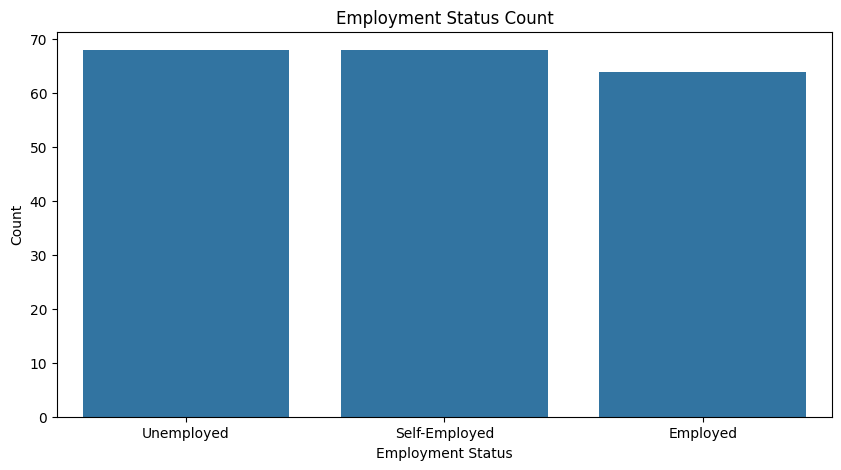

In [20]:
#Bar Plot
plt.figure(figsize=(10, 5))
sn.countplot(x='EmploymentStatus', data=df)
plt.title('Employment Status Count')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

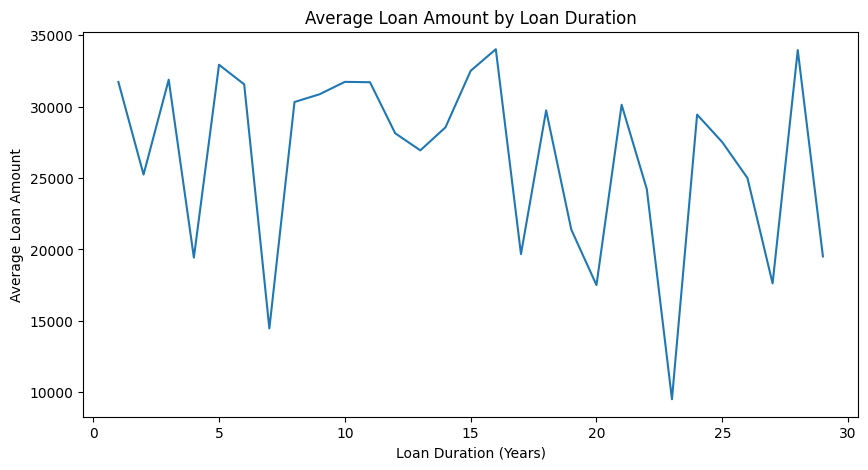

In [21]:
#Line Plot
plt.figure(figsize=(10, 5))
sn.lineplot(data=df.groupby('LoanDuration')['LoanAmount'].mean())
plt.title('Average Loan Amount by Loan Duration')
plt.xlabel('Loan Duration (Years)')
plt.ylabel('Average Loan Amount')
plt.show()

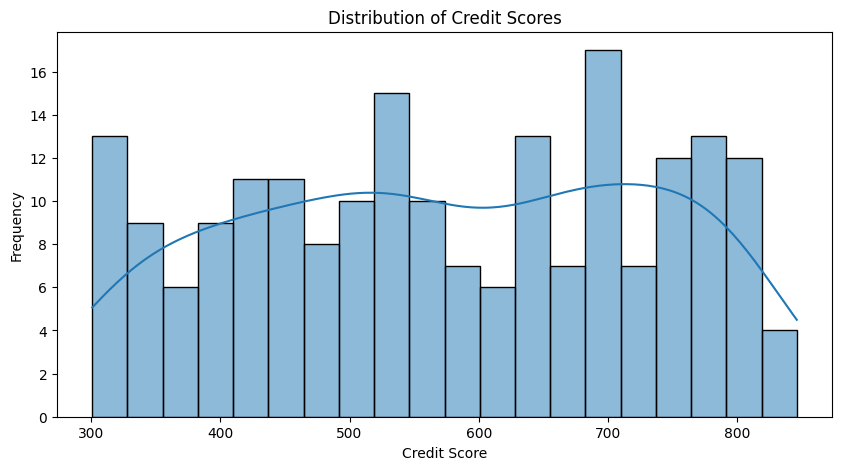

In [22]:
#Histogram
plt.figure(figsize=(10, 5))
sn.histplot(df['CreditScore'], bins=20, kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

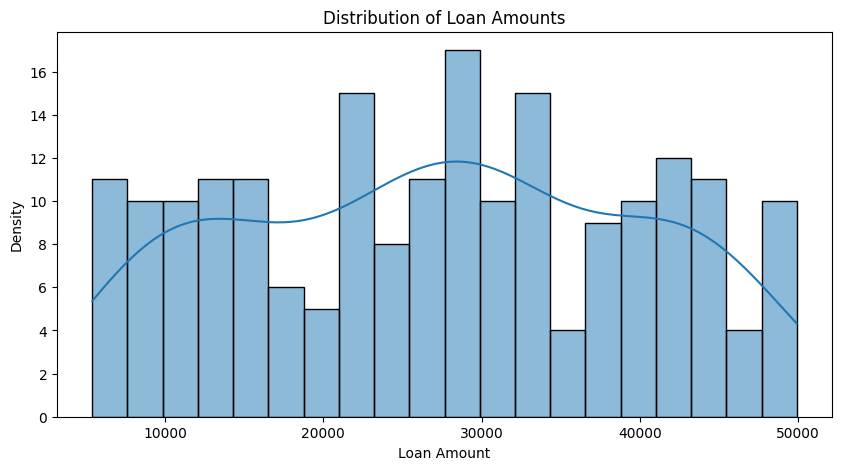

In [23]:
# 4. Distplot 
plt.figure(figsize=(10, 5))
sn.histplot(df['LoanAmount'], bins=20, kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()

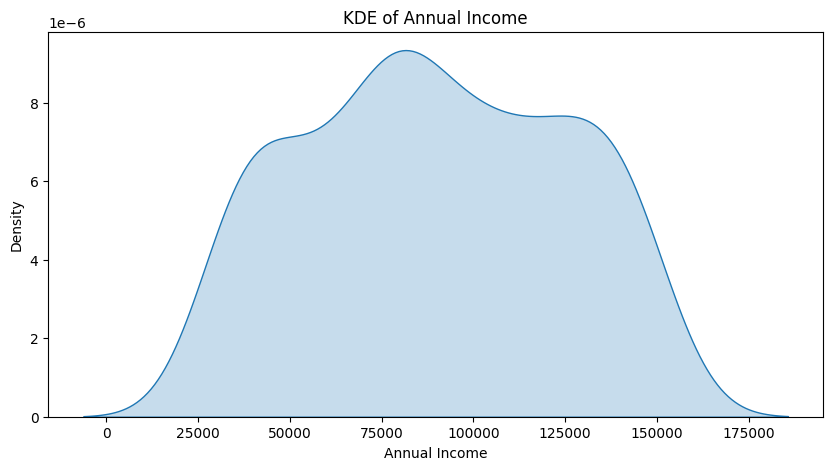

In [24]:
#KDE Plot
plt.figure(figsize=(10, 5))
sn.kdeplot(df['AnnualIncome'], fill=True)
plt.title('KDE of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.show()

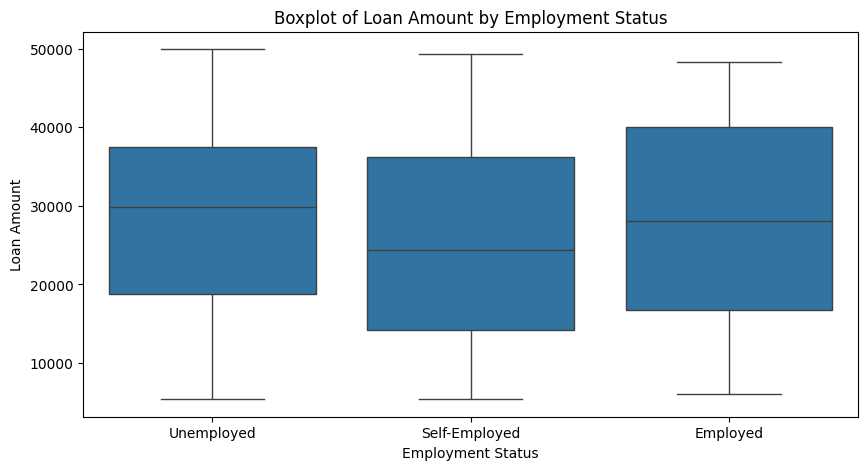

In [25]:
#Boxplot
plt.figure(figsize=(10, 5))
sn.boxplot(x='EmploymentStatus', y='LoanAmount', data=df)
plt.title('Boxplot of Loan Amount by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Loan Amount')
plt.show()

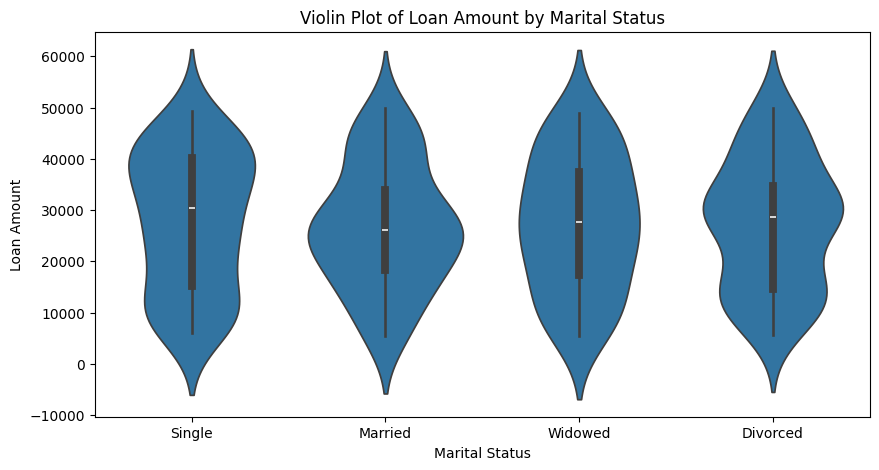

In [26]:
#Violin Plot
plt.figure(figsize=(10, 5))
sn.violinplot(x='MaritalStatus', y='LoanAmount', data=df)
plt.title('Violin Plot of Loan Amount by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Loan Amount')
plt.show()

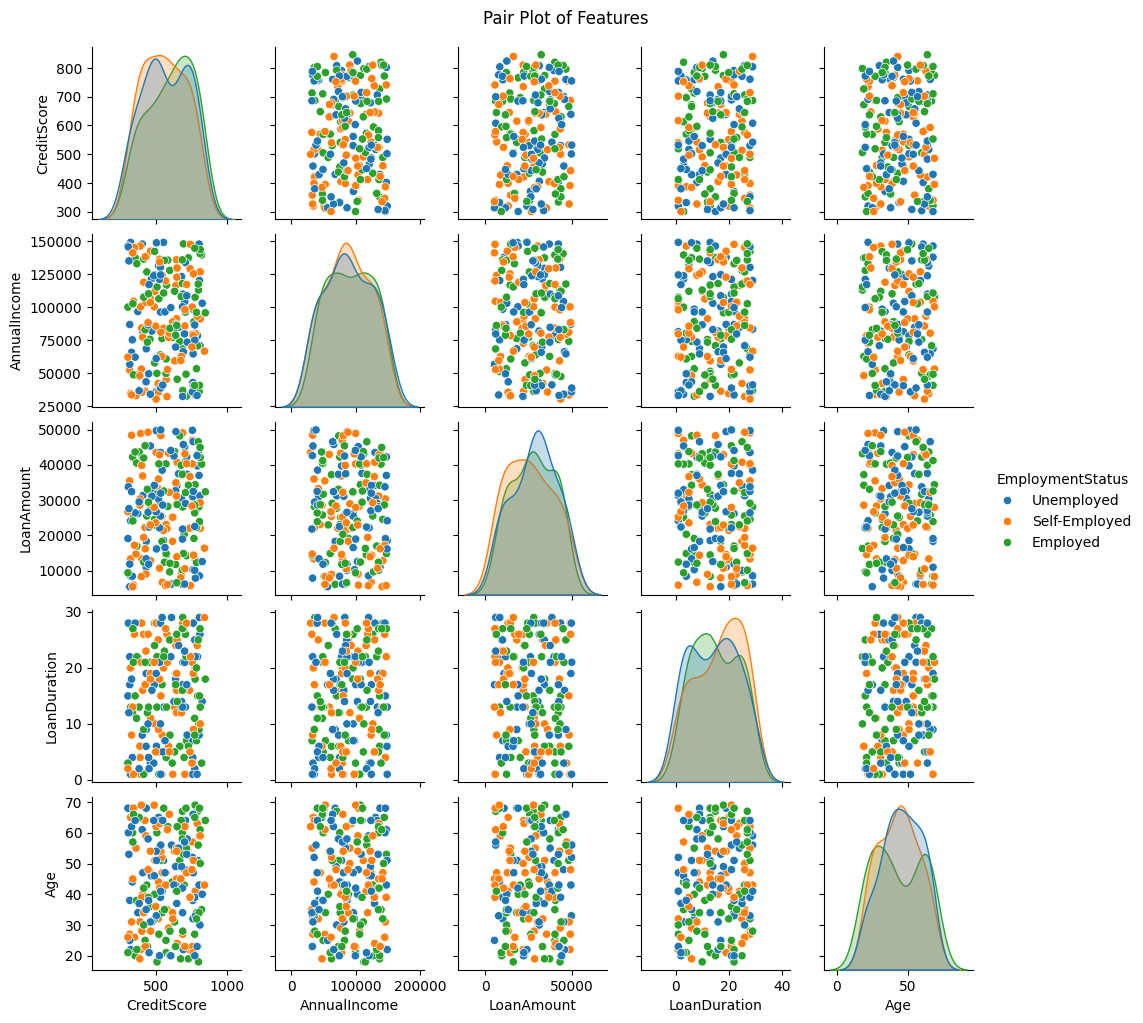

In [27]:
#Pair Plot
sn.pairplot(df, hue='EmploymentStatus', height=2)
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()
